# Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier


from sklearn.model_selection import RandomizedSearchCV

from sklearn.model_selection import train_test_split

from scipy import stats
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score

sns.set()
pd.set_option('max_colwidth', 100)

# Loading data

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
train_df.head()

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
0,0,58238,971.303,397.202654,186.945510,2.124697,0.882317,58977,272.306674,0.604756,0.987470,0.775723,0.685561,0.006820,0.000929,0.469994,0.998595,HOROZ
1,1,44515,757.601,265.590470,213.967453,1.241266,0.592420,44780,238.071960,0.771745,0.994082,0.974620,0.896387,0.005966,0.002376,0.803510,0.997370,SEKER
2,2,31662,653.783,239.902428,168.421505,1.424417,0.712136,32034,200.781748,0.801407,0.988387,0.930853,0.836931,0.007577,0.002293,0.700453,0.997737,DERMASON
3,3,38778,734.020,268.446281,184.061923,1.458456,0.727925,39208,222.201897,0.766137,0.989033,0.904439,0.827733,0.006923,0.002005,0.685142,0.999250,DERMASON
4,4,42530,775.403,281.212824,193.236878,1.455275,0.726511,43028,232.703412,0.729816,0.988426,0.888895,0.827499,0.006612,0.001912,0.684755,0.996507,SIRA


In [4]:
test_df.head()

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,10834,57659,955.434,387.757607,196.625782,1.972059,0.861896,60188,270.949661,0.620790,0.957982,0.793735,0.698760,0.006725,0.000989,0.488266,0.962889
1,10835,28772,630.362,229.990785,159.609367,1.440960,0.719993,29127,191.399185,0.767458,0.987812,0.909913,0.832204,0.007994,0.002365,0.692563,0.997956
2,10836,54677,911.022,308.853903,226.398571,1.364204,0.680198,55858,263.850182,0.753013,0.978857,0.827860,0.854288,0.005649,0.001856,0.729808,0.995607
3,10837,24827,578.304,214.192699,147.788172,1.449322,0.723831,25121,177.794033,0.716508,0.988297,0.932871,0.830066,0.008627,0.002526,0.689009,0.998596
4,10838,141850,1432.847,524.923471,346.910920,1.513136,0.750492,143680,424.981211,0.804617,0.987263,0.868240,0.809606,0.003701,0.000981,0.655462,0.991803


# Encoding Lables

In [5]:
label_enc = LabelEncoder()
y_encoded = label_enc.fit_transform(train_df['y'])
classes_names = label_enc.classes_

# Exploring the data

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10834 entries, 0 to 10833
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10834 non-null  int64  
 1   Area             10834 non-null  int64  
 2   Perimeter        10834 non-null  float64
 3   MajorAxisLength  10834 non-null  float64
 4   MinorAxisLength  10834 non-null  float64
 5   AspectRation     10834 non-null  float64
 6   Eccentricity     10834 non-null  float64
 7   ConvexArea       10834 non-null  int64  
 8   EquivDiameter    10834 non-null  float64
 9   Extent           10834 non-null  float64
 10  Solidity         10834 non-null  float64
 11  roundness        10834 non-null  float64
 12  Compactness      10834 non-null  float64
 13  ShapeFactor1     10834 non-null  float64
 14  ShapeFactor2     10834 non-null  float64
 15  ShapeFactor3     10834 non-null  float64
 16  ShapeFactor4     10834 non-null  float64
 17  y           

<div style="background-color:rgb(221, 207, 230)">
The data does not have NaN values, and the datatypes seem to be correct.<br>
All features are numerical, so there is no need to encode any of them. However, the target 'y' requires encoding.
</div>

In [7]:
train_df.duplicated().sum()

0

<div style="background-color:rgb(221, 207, 230)">
The data does not have duplicate obervations
</div>    

In [8]:
train_df.describe().drop('ID', axis=1)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000,10834.000000
mean,53095.675189,855.274892,320.036169,202.410342,1.581294,0.750588,53816.205926,253.123583,0.749937,0.987152,0.873647,0.800244,0.006559,0.001718,0.644139,0.995083
std,29542.542580,214.991122,85.961630,45.113965,0.244314,0.091481,29999.710739,59.433080,0.048949,0.004626,0.059344,0.061228,0.001127,0.000593,0.098268,0.004306
min,20420.000000,524.932000,183.601165,129.576207,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.645368,0.002856,0.000564,0.416499,0.947687
25%,36343.500000,703.601250,253.501071,175.927024,1.432985,0.716250,36731.250000,215.113880,0.718778,0.985627,0.833479,0.763378,0.005888,0.001161,0.582747,0.993690
50%,44645.000000,793.739500,296.377365,192.525040,1.550761,0.764314,45148.000000,238.419335,0.760141,0.988290,0.883472,0.801428,0.006643,0.001700,0.642287,0.996397
75%,61295.000000,975.517500,376.068399,217.315195,1.703029,0.809450,62251.500000,279.362162,0.786871,0.990014,0.916883,0.834068,0.007268,0.002169,0.695670,0.997895
max,254616.000000,1985.370000,738.860153,450.926187,2.388873,0.908167,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.009897,0.003665,0.974767,0.999733


<div style="background-color:rgb(221, 207, 230)">
The features need to be scaled.<br>
To determine which scaler to use for each feature, we will check their distributions.
</div>

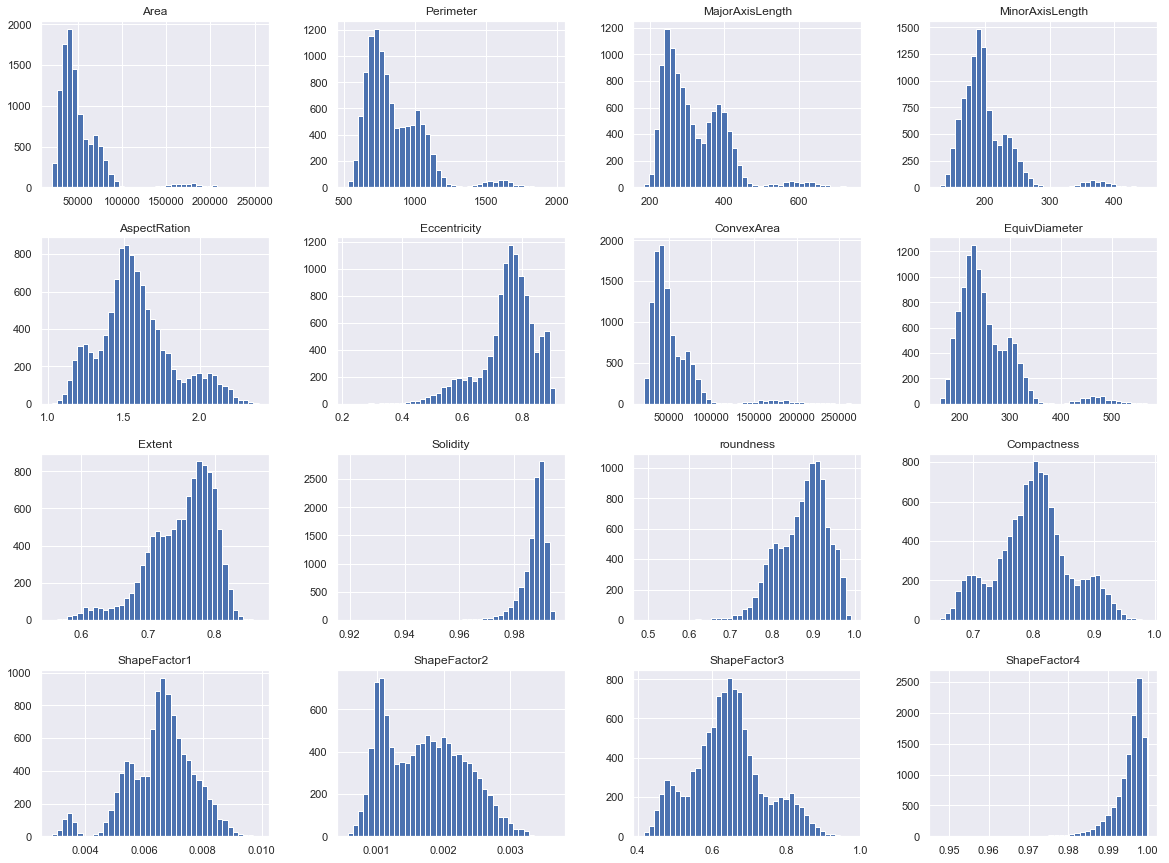

In [9]:
train_df.drop(['ID','y'], axis=1).hist(layout=(4,4), figsize=(20,15),bins=40)
plt.show()

<div style="background-color:rgb(221, 207, 230)">
Features that are skewed, will be transformed using box-cox power transformer<br>
Features that approximate a normal distribution will be standardized.<br>
<br>
<b>Power transform</b>: Area, Perimeter, MajorAxisLength, MinorAxisLength, Eccentricity, ConvexArea, EquivDiameter, Extent, Solidity, roundness,ShapeFactor4.<br>
<b>Standardization</b>: AspectRation, Compactness, ShapeFactor1, ShapeFactor2, ShapeFactor3
</div>

In [10]:
features_to_standardize =['AspectRation', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3']

features_to_powerTransform = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea',
                              'EquivDiameter', 'Extent', 'Solidity', 'roundness', 'ShapeFactor4']

In [11]:
features_correlation = train_df.drop(['ID','y'], axis=1).corr().abs()
mask = np.zeros_like(features_correlation)
#set upper triangle to 1
mask[np.triu_indices_from(mask)]=True


<AxesSubplot:>

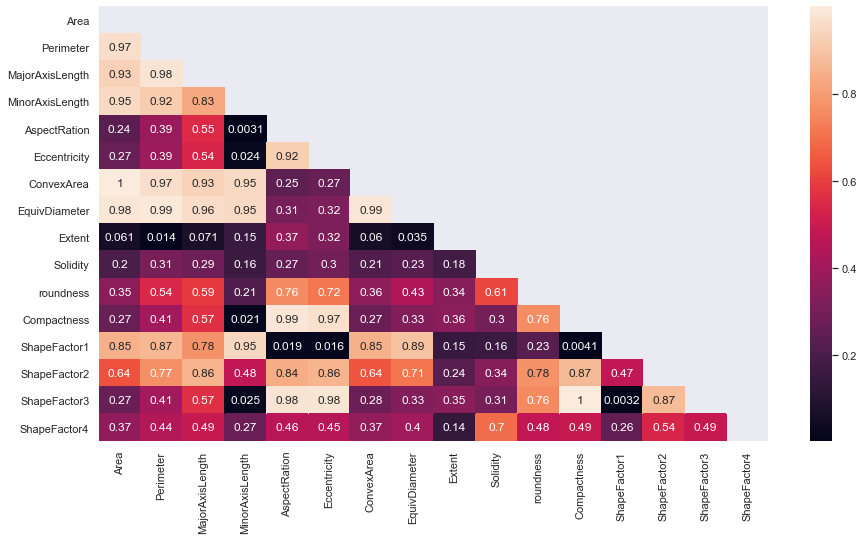

In [12]:
plt.figure(figsize=(15,8))
sns.heatmap(features_correlation, mask=mask, annot=True)

<div style="background-color:rgb(221, 207, 230)">
Some features are highly correlated.<br>
We will use PCA to handle this.

</div>


In [13]:
correlated_features_set1 = [ 'Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'ConvexArea', 'EquivDiameter', 'ShapeFactor1']
correlated_features_set2 = ['Compactness', 'ShapeFactor3']

#### Determining the number of components to select

Firstly, the features need to be scaled

In [14]:
scaled_train_df = train_df.copy()
scaled_train_df[features_to_standardize] = StandardScaler().fit_transform(train_df[features_to_standardize])
scaled_train_df[features_to_powerTransform] = PowerTransformer(method='box-cox').fit_transform(train_df[features_to_powerTransform])


In [15]:
pca_transformer_set1 = PCA()
pca_results_set1 = pca_transformer_set1.fit_transform(scaled_train_df[correlated_features_set1])

In [16]:
pca_transformer_set1.explained_variance_ratio_.cumsum()

array([0.93528912, 0.99722153, 0.99887665, 0.99985818, 0.99999483,
       1.        , 1.        ])

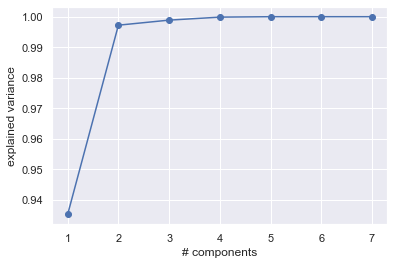

In [17]:
plt.plot(range(1,len(pca_transformer_set1.explained_variance_ratio_)+1), pca_transformer_set1.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('# components')
plt.ylabel('explained variance')
plt.show()

<div style="background-color:rgb(221, 207, 230)">
For the first set of features, the first 2 components alone explain 99% of the variance.<br>
It will be the only component selected, replacing all the features in this set.
</div>


In [18]:
pca_transformer_set2 = PCA()
pca_results_set2 = pca_transformer_set2.fit_transform(scaled_train_df[correlated_features_set2])

In [19]:
pca_transformer_set2.explained_variance_ratio_.cumsum()

array([0.99934183, 1.        ])

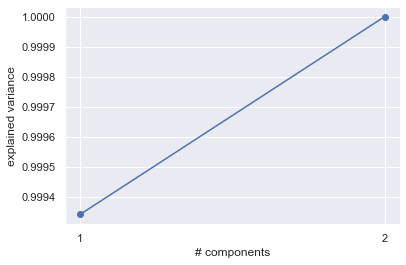

In [20]:
plt.plot(range(1,len(pca_transformer_set2.explained_variance_ratio_)+1), pca_transformer_set2.explained_variance_ratio_.cumsum(), marker='o')
plt.xticks([1,2])
plt.xlabel('# components')
plt.ylabel('explained variance')
plt.show() 

<div style="background-color:rgb(221, 207, 230)">
For the second set of features, the first component explains 99% of the variance.<br>
It will be the only component selected, replacing all the features in this set.
</div>

In [21]:
train_df['y'].value_counts()

DERMASON    2837
SIRA        2109
SEKER       1621
HOROZ       1488
CALI        1304
BARBUNYA    1057
BOMBAY       418
Name: y, dtype: int64

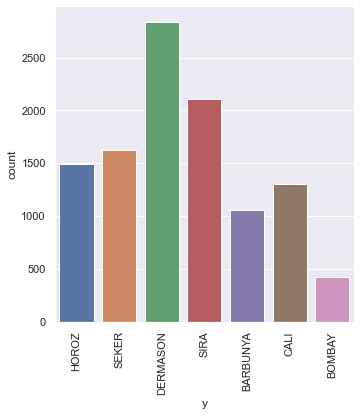

In [22]:
sns.catplot(x='y', data=train_df, kind='count')
plt.xticks(rotation=90)
plt.show()


The data is not significantly imbalanced, except for the class 'BOMBAY' that is being under-represented, and class 'DERMASON' that is being over-represented

In [23]:
train_df.columns

Index(['ID', 'Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'y'],
      dtype='object')

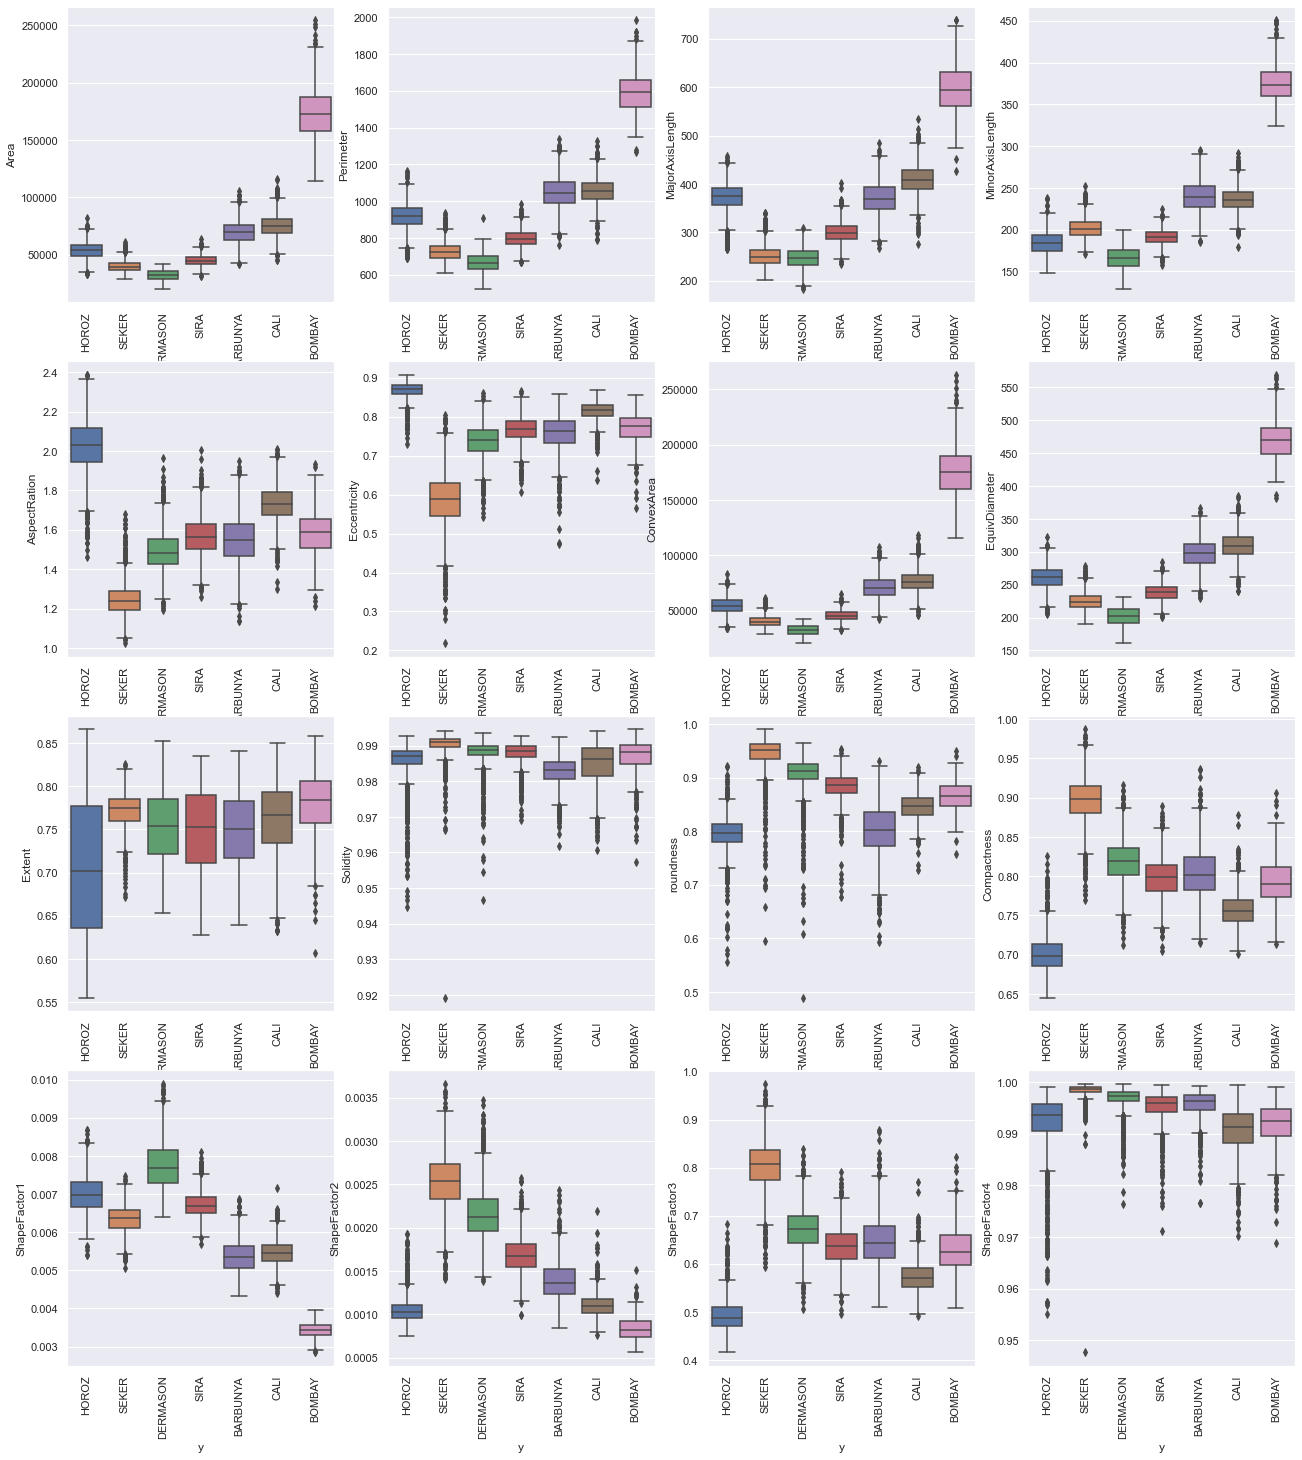

In [24]:
names = train_df.drop(['ID','y'], axis=1).columns
fig, axes = plt.subplots(4,4, figsize=(22,25))

for i,t in enumerate(names):
    ax = sns.boxplot(y=t, x= "y", data=train_df, orient='v', ax=axes.flatten()[i] )
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

<div style="background-color:rgb(221, 207, 230)">
    The features <b>Extent, Solidity, ShapeFactor4</b> do not provide much discrimination between the classes. So we might consider excluding them.
</div>

# Visualizing classes using t-SNE

In [25]:
# pca2_allFeatures = PCA(n_components=2).fit_transform(MinMaxScaler().fit_transform(train_df.select_dtypes(include=np.number)))

# #pca2_allFeatures = PCA(n_components=2).fit_transform(scaled_train_df.select_dtypes(include=np.number))
# plt.figure(figsize=(15,8))
# sns.scatterplot(y=pca2_allFeatures[:,0], x=pca2_allFeatures[:,1], hue= train_df['y'], palette='deep')

In [26]:
from sklearn.manifold import TSNE

<AxesSubplot:>

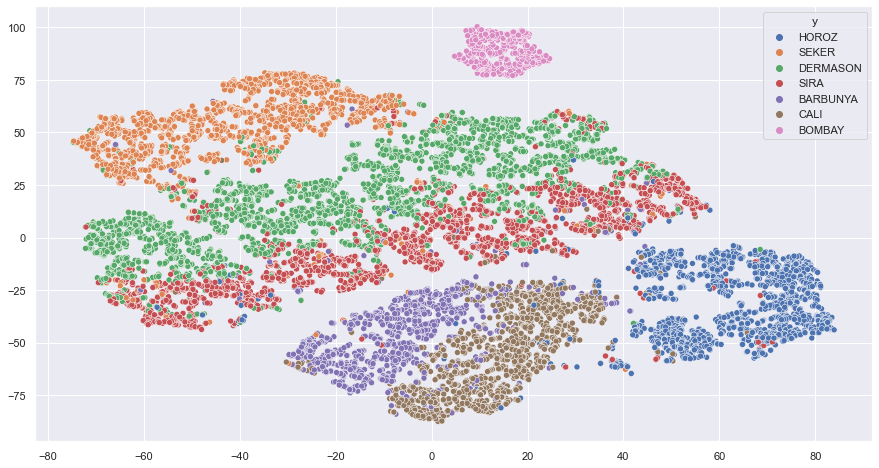

In [27]:
tsne_res = TSNE(n_components=2).fit_transform(MinMaxScaler().fit_transform(train_df.select_dtypes(include=np.number)))

plt.figure(figsize=(15,8))
sns.scatterplot(x=tsne_res[:,0], y=tsne_res[:,1], hue= train_df['y'], palette='deep')

<div style="background-color:rgb(221, 207, 230)">
We notice that class <b>'BOMBAY'</b> is well-separeted from the other classes.<br>
Whereas classes <b>'DERMASON'</b> and <b>'SIRA'</b> are the most intertwined.
</div>

# Exploring classes DERMASON and SIRA

In [28]:
def get_DERMASON_SIRA_idx(features, enc_labels, classes_names):
    '''
    Extract DERMASON and SIRA instances
    
    Parameters:
    ----------
    features: Pandas Dataframe
        dataset in the form # observations x # features, to extract DERMSON and SIRA instances from
        
    enc_labels: 1D numpy array
        encoded labels to subset DERMASON and SIRA labels from
        
    Return:
    ------
    features_dermasonSira: Pandas Dataframe
    enc_labels_dermasonSira: 1D numpy array
    '''
    
    dermason_sira_idx = np.where((enc_labels==classes_names.tolist().index('DERMASON')) | (enc_labels==classes_names.tolist().index('SIRA')) )[0]
    features_dermasonSira = features.iloc[dermason_sira_idx,:]
    enc_labels_dermasonSira = enc_labels[dermason_sira_idx]
    
    return features_dermasonSira, enc_labels_dermasonSira

In [29]:
X_dermasonSira, y_dermasonSira = get_DERMASON_SIRA_idx(scaled_train_df.drop(['ID'], axis=1),
                                                       y_encoded,
                                                       classes_names)


In [30]:
dermason = X_dermasonSira.query('y == "DERMASON"')
sira = X_dermasonSira.query('y == "SIRA"')

#check normality assumption for the t-test
normality_dermason_pvalue = [stats.shapiro(dermason[i]).pvalue for i in dermason.drop('y', axis=1).columns]
normality_sira_pvalue = [stats.shapiro(sira[i]).pvalue for i in sira.drop('y', axis=1).columns]


#Checking homogeneity of variance assumption
homogeneity_pvalue = [stats.levene(dermason[i], sira[i]).pvalue for i in dermason.drop('y', axis=1).columns]


In [31]:
#rouonding the exponential floats
def round_exp_list(ls):
    return list( map(lambda x:format(x, '.3g'), ls) )

normality_dermason_pvalue_round = round_exp_list(normality_dermason_pvalue)
normality_sira_pvalue_round = round_exp_list(normality_sira_pvalue)
homogeneity_pvalue_round = round_exp_list(homogeneity_pvalue) 
 
#Converting into dataframe
pd.DataFrame( [normality_dermason_pvalue_round, normality_sira_pvalue_round, homogeneity_pvalue_round],
             columns=X_dermasonSira.drop('y', axis=1).columns,
             index=['normality_dermason_pvalue', 'normality_sira_pvalue', 'homogeneity_pvalue'] )

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
normality_dermason_pvalue,1.36e-21,3.83e-19,1.68e-17,1.95e-20,5.77e-11,0.506,1.47e-21,1.36e-21,6.34e-25,1.33e-16,7.02e-38,0.0765,1.35e-15,8.35e-18,0.0306,1.44e-25
normality_sira_pvalue,1.71e-09,6.65e-06,0.000782,1.08e-15,3.16e-09,0.145,3.1e-09,1.71e-09,5.95e-25,1e-09,1.58e-19,0.0344,3.74e-12,3.6e-06,0.062,1.77e-10
homogeneity_pvalue,1.56e-164,7.85e-137,3.03e-78,7.08e-179,0.73,0.000384,1.83e-164,1.56e-164,3.81e-22,0.000208,3.2e-07,0.00351,7.11e-144,1.57e-40,4.04e-05,1.43e-11


<div style="background-color:rgb(221, 207, 230)">
Most of the p_values are below a significance level of 0.05, which provides strong evidence to <b>reject the null hypothesis</b> that they don't meet the normality and homogeneity conditions.<br>
</div>

In [32]:
#Performing t-test
ttest_res = stats.ttest_ind(dermason.drop('y',axis=1), sira.drop('y',axis=1), equal_var=False)
print(round_exp_list(ttest_res.pvalue))

['0', '0', '0', '0', '2.59e-165', '2.3e-172', '0', '0', '0.23', '0.000212', '1.44e-232', '9.15e-179', '0', '0', '2.72e-180', '8.36e-143']


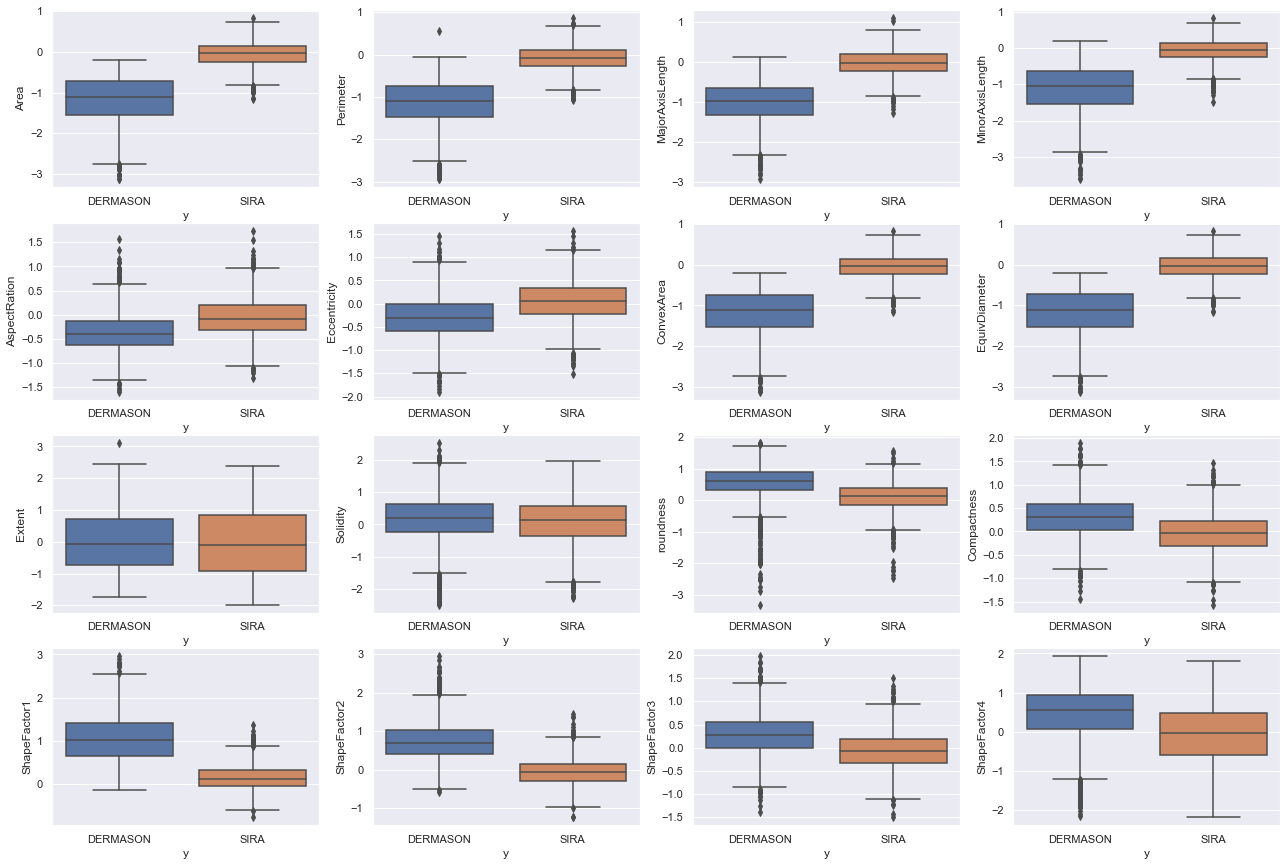

In [33]:
names = X_dermasonSira.drop('y', axis=1).columns
fig, axes = plt.subplots(4,4, figsize=(22,15))

for i,t in enumerate(names):
    sns.boxplot(y=t, x= "y", data=X_dermasonSira, orient='v', ax=axes.flatten()[i])

<div style="background-color:rgb(221, 207, 230)">
From previous boxplots, the features:<br> 
<b>'Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength','ConvexArea', 'EquivDiameter','ShapeFactor1', 'ShapeFactor2'</b><br>
provide decent discrimination between the two classes
</div>

In [34]:
disc_features_dermasonSira = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength','ConvexArea', 'EquivDiameter','ShapeFactor1', 'ShapeFactor2']

# Pipelines

In [35]:
X_train, X_val, y_train, y_val = train_test_split(train_df.drop(['ID', 'y'],axis=1), y_encoded, test_size=0.2, random_state=0, stratify=y_encoded)

### 1- Scaling, and classifying using logistic regression

In [36]:
features_to_standardize =['AspectRation', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3']

features_to_powerTransform = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea',
                              'EquivDiameter', 'Extent', 'Solidity', 'roundness', 'ShapeFactor4']

scoring = {'acc': 'accuracy',
           'f1': 'f1_weighted'}


scaling = ColumnTransformer(transformers=[
    ('standardization', StandardScaler(), features_to_standardize),
    ('box_cox', PowerTransformer(method='box-cox'), features_to_powerTransform)],
                            
                           remainder='passthrough')

pipeline = Pipeline(steps=[
    ('scaler', scaling),
    ('classifier', LogisticRegression(solver='sag', max_iter=3000, C=5))])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardization',
                                                  StandardScaler(),
                                                  ['AspectRation',
                                                   'Compactness',
                                                   'ShapeFactor1',
                                                   'ShapeFactor2',
                                                   'ShapeFactor3']),
                                                 ('box_cox',
                                                  PowerTransformer(method='box-cox'),
                                                  ['Area', 'Perimeter',
                                                   'MajorAxisLength',
                                                   'MinorAxisLength',
                                                   'Eccentricity', 'ConvexArea',


In [37]:
cv_score= cross_validate(pipeline, X_train, y_train, scoring=scoring,cv=5)

print('Cross-validation accuracy',cv_score['test_acc'].mean())
print('Accuracy on training set',pipeline.score(X_train, y_train))
print('Accuracy on test set',pipeline.score(X_val, y_val))


print('\n\nCross-validation F1 score',cv_score['test_f1'].mean())

pred_trainSet = pipeline.predict(X_train)
print('F1 score on training set', f1_score(y_train, pred_trainSet, average='weighted'))

pred_valSet = pipeline.predict(X_val)
print('F1 score on test set', f1_score(y_val, pred_valSet, average='weighted'))

Cross-validation accuracy 0.9252326272486524
Accuracy on training set 0.9261566862812969
Accuracy on test set 0.9275496077526535


Cross-validation F1 score 0.9253563513972232
F1 score on training set 0.9262951029566259
F1 score on test set 0.927732930363943


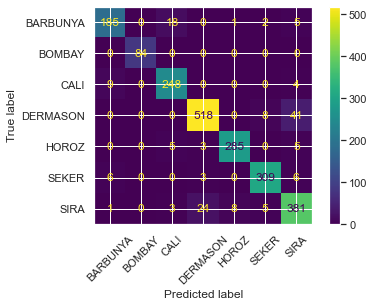

In [38]:
plot_confusion_matrix(pipeline, X_val, y_val, display_labels=classes_names, xticks_rotation=45)

In [39]:
models = {}
models['Logistic_scaling'] = {'pipeline':pipeline, 'f1':cv_score['test_f1'].mean()}

### Introducing cost-sensitive learning

from the confucion matrix, it seems that the model confuses between SIRA and DERMASON classes.  
So, we will try incurring more weight on miss-classifications of these two classes.

In [40]:
pipeline = Pipeline(steps=[
    ('scaler', scaling),
    ('classifier', LogisticRegression(solver='sag', max_iter=3000, C=5, class_weight={classes_names.tolist().index('DERMASON'):1.7, classes_names.tolist().index('SIRA'):1.5}))])

pipeline.fit(X_train, y_train)


Pipeline(steps=[('scaler',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardization',
                                                  StandardScaler(),
                                                  ['AspectRation',
                                                   'Compactness',
                                                   'ShapeFactor1',
                                                   'ShapeFactor2',
                                                   'ShapeFactor3']),
                                                 ('box_cox',
                                                  PowerTransformer(method='box-cox'),
                                                  ['Area', 'Perimeter',
                                                   'MajorAxisLength',
                                                   'MinorAxisLength',
                                                   'Eccentricity', 'ConvexArea',


In [41]:
cv_score= cross_validate(pipeline, X_train, y_train, scoring=scoring,cv=5)

print('Cross-validation accuracy',cv_score['test_acc'].mean())
print('Accuracy on training set',pipeline.score(X_train, y_train))
print('Accuracy on test set',pipeline.score(X_val, y_val))


print('\n\nCross-validation F1 score',cv_score['test_f1'].mean())

pred_trainSet = pipeline.predict(X_train)
print('F1 score on training set', f1_score(y_train, pred_trainSet, average='weighted'))

pred_valSet = pipeline.predict(X_val)
print('F1 score on test set', f1_score(y_val, pred_valSet, average='weighted'))

Cross-validation accuracy 0.9251174201054102
Accuracy on training set 0.9265028268143533
Accuracy on test set 0.9266266728195662


Cross-validation F1 score 0.9253497996546394
F1 score on training set 0.9267452924679572
F1 score on test set 0.9268834189914859


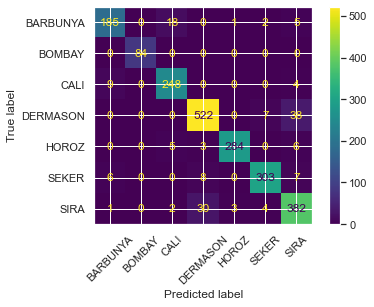

In [42]:
plot_confusion_matrix(pipeline, X_val, y_val, display_labels=classes_names, xticks_rotation=45)

In [43]:
models['Logistic_scaling_costSensitive'] = {'pipeline':pipeline, 'f1':cv_score['test_f1'].mean()}

## Logistic regression with PCA

In [44]:
#Defining custom scalers that return dataframes instead of numpy arrays
def stdScaler_df(df):
    df_copy = df.copy() #otherwise, the changes affect X_train
    #print(df.shape)
    features_to_standardize =['AspectRation', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3']
    df_copy[features_to_standardize] = StandardScaler().fit_transform(df_copy[features_to_standardize])
    #print(df.shape)
    return df_copy


def powerTrans_df(df):
    df_copy = df.copy()
    features_to_powerTransform = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea',
                              'EquivDiameter', 'Extent', 'Solidity', 'roundness', 'ShapeFactor4']
    df_copy[features_to_powerTransform] = PowerTransformer(method='box-cox').fit_transform(df_copy[features_to_powerTransform])
    return df_copy
    
#Make the custom scalers as transformers to be used in the pipeline    
StandardScaler_retDF = FunctionTransformer(stdScaler_df) 
PowerTransformer_retDF = FunctionTransformer(powerTrans_df) 

In [45]:
#Defining custom PCA that returns certain components in a dataframe with the rest of the uncorrelated features
def pca_df(df):
    df_copy = df.copy()
    #print("original df: ",df_copy.shape)
    correlated_features_set1 = [ 'Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'ConvexArea', 'EquivDiameter', 'ShapeFactor1']
    correlated_features_set2 = ['Compactness', 'ShapeFactor3']
    
    res_set1 = PCA(n_components=2).fit_transform(df_copy[correlated_features_set1])
    #print("PCA 1: ",res_set1.shape)
    res_set2 = PCA(n_components=1).fit_transform(df_copy[correlated_features_set2])
    #print("PCA 2: ",res_set2.shape)
    
    all_desired_pca = np.append(res_set1, res_set2, axis=1)
    #print("All PCA: ",all_desired_pca.shape)
    df_all_desired_pca = pd.DataFrame(all_desired_pca, columns=['PCA_{}'.format(i) for i in range(all_desired_pca.shape[1])])
    #print("All PCA df: ",df_all_desired_pca.shape)
    
    #drop the correlated features
    df_uncorrelated = df_copy.drop(correlated_features_set1+ correlated_features_set2, axis=1).reset_index(drop=True)
    #print("uncorrelated df: ",df_uncorrelated.shape)
    
    #concatenate PCA components with the uncorrelated features into a single dataframe
    df_all = df_uncorrelated.join( df_all_desired_pca)
    #print("concatenated: ",df_all.isna().sum())
    
    return df_all
    
    
#Make it as a transformer to be used in the pipeline    
PCA_retDF = FunctionTransformer(pca_df) 
    

In [46]:
pipeline = Pipeline(steps=[
    ('standardization', StandardScaler_retDF),
    ('box_cox', PowerTransformer_retDF),
    ('pca', PCA_retDF),
    ('classifier', LogisticRegression(solver='sag', max_iter=3000, C=5))])

pipeline.fit(X_train, y_train)


Pipeline(steps=[('standardization',
                 FunctionTransformer(func=<function stdScaler_df at 0x000001E6CF7D20D0>)),
                ('box_cox',
                 FunctionTransformer(func=<function powerTrans_df at 0x000001E6CF7D2430>)),
                ('pca',
                 FunctionTransformer(func=<function pca_df at 0x000001E6CF7D2700>)),
                ('classifier',
                 LogisticRegression(C=5, max_iter=3000, solver='sag'))])

In [47]:
cv_score= cross_validate(pipeline, X_train, y_train, scoring=scoring,cv=5)

print('Cross-validation accuracy',cv_score['test_acc'].mean())
print('Accuracy on training set',pipeline.score(X_train, y_train))
print('Accuracy on test set',pipeline.score(X_val, y_val))


print('\n\nCross-validation F1 score',cv_score['test_f1'].mean())

pred_trainSet = pipeline.predict(X_train)
print('F1 score on training set', f1_score(y_train, pred_trainSet, average='weighted'))

pred_valSet = pipeline.predict(X_val)
print('F1 score on test set', f1_score(y_val, pred_valSet, average='weighted'))

Cross-validation accuracy 0.824944443002414
Accuracy on training set 0.9251182646821277
Accuracy on test set 0.928011075219197


Cross-validation F1 score 0.8078378488046571
F1 score on training set 0.9252521042749222
F1 score on test set 0.9281342842519968


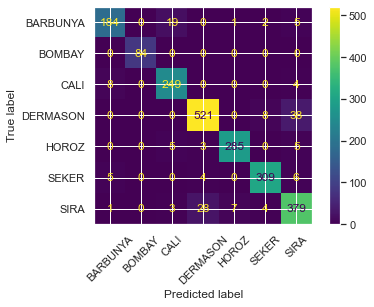

In [48]:
plot_confusion_matrix(pipeline, X_val, y_val, display_labels=classes_names, xticks_rotation=45)

In [49]:
models['Logistic_scaling_Pca2Components'] = {'pipeline':pipeline, 'f1':cv_score['test_f1'].mean()}

### Logistic regression with MinMaxScaler

In [50]:
features_to_normalize = train_df.drop(['ID','y'], axis=1).columns
minMax = ColumnTransformer(transformers=[
    ('MinMaxScaler', MinMaxScaler(), features_to_normalize)],
                         remainder='passthrough')

pipeline = Pipeline(steps=[
    ('scaler', minMax),
    ('classifier', LogisticRegression(solver='sag', max_iter=2000, C=5))])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('MinMaxScaler',
                                                  MinMaxScaler(),
                                                  Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4'],
      dtype='object'))])),
                ('classifier',
                 LogisticRegression(C=5, max_iter=2000, solver='sag'))])

In [51]:
cv_score= cross_validate(pipeline, X_train, y_train, scoring=scoring,cv=5)

print('Cross-validation accuracy',cv_score['test_acc'].mean())
print('Accuracy on training set',pipeline.score(X_train, y_train))
print('Accuracy on test set',pipeline.score(X_val, y_val))


print('\n\nCross-validation F1 score',cv_score['test_f1'].mean())

pred_trainSet = pipeline.predict(X_train)
print('F1 score on training set', f1_score(y_train, pred_trainSet, average='weighted'))

pred_valSet = pipeline.predict(X_val)
print('F1 score on test set', f1_score(y_val, pred_valSet, average='weighted'))

Cross-validation accuracy 0.9175021680373721
Accuracy on training set 0.9190031152647975
Accuracy on test set 0.9243193354868482


Cross-validation F1 score 0.9176856462322791
F1 score on training set 0.9191851515558132
F1 score on test set 0.9245350194962946


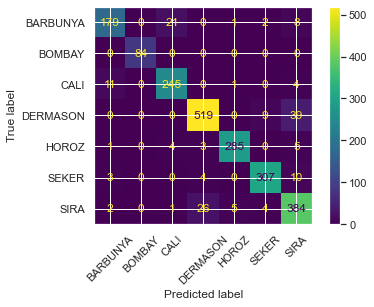

In [52]:
plot_confusion_matrix(pipeline, X_val, y_val, display_labels=classes_names, xticks_rotation=45)

In [53]:
models['Logistic_minMaxAllFeat'] = {'pipeline':pipeline, 'f1':cv_score['test_f1'].mean()}

### Logistic regression with PCA on min-max normalized features

In [54]:
features_to_normalize = train_df.drop(['ID','y'], axis=1).columns
minMax = ColumnTransformer(transformers=[
    ('MinMaxScaler', MinMaxScaler(), features_to_normalize)],
                         remainder='passthrough')

pipeline = Pipeline(steps=[
    ('scaler', minMax),
    ('pca', PCA()),
    ('classifier', LogisticRegression(solver='sag', max_iter=2000, C=5))])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('MinMaxScaler',
                                                  MinMaxScaler(),
                                                  Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4'],
      dtype='object'))])),
                ('pca', PCA()),
                ('classifier',
                 LogisticRegression(C=5, max_iter=2000, solver='sag'))])

In [55]:
cv_score= cross_validate(pipeline, X_train, y_train, scoring=scoring,cv=5)

print('Cross-validation accuracy',cv_score['test_acc'].mean())
print('Accuracy on training set',pipeline.score(X_train, y_train))
print('Accuracy on test set',pipeline.score(X_val, y_val))


print('\n\nCross-validation F1 score',cv_score['test_f1'].mean())

pred_trainSet = pipeline.predict(X_train)
print('F1 score on training set', f1_score(y_train, pred_trainSet, average='weighted'))

pred_valSet = pipeline.predict(X_val)
print('F1 score on test set', f1_score(y_val, pred_valSet, average='weighted'))

Cross-validation accuracy 0.9175021680373721
Accuracy on training set 0.9190031152647975
Accuracy on test set 0.9243193354868482


Cross-validation F1 score 0.9176856462322791
F1 score on training set 0.9191851515558132
F1 score on test set 0.9245350194962946


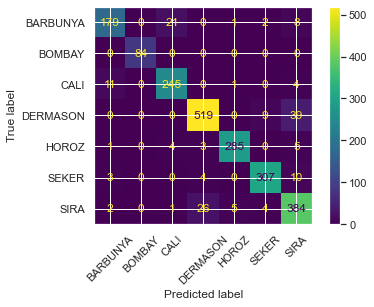

In [56]:
plot_confusion_matrix(pipeline, X_val, y_val, display_labels=classes_names, xticks_rotation=45)

In [57]:
models['Logistic_minMaxAllFeat_pcaAllComp'] = {'pipeline':pipeline, 'f1':cv_score['test_f1'].mean()}

### Random Forest

In [58]:
features_to_standardize =['AspectRation', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3']

features_to_powerTransform = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea',
                              'EquivDiameter', 'Extent', 'Solidity', 'roundness', 'ShapeFactor4']

scaling = ColumnTransformer(transformers=[
    ('standardization', StandardScaler(), features_to_standardize),
    ('box_cox', PowerTransformer(method='box-cox'), features_to_powerTransform)],
                            
                           remainder='passthrough')

pipeline = Pipeline(steps=[
    ('scaler', scaling),
    ('classifier', RandomForestClassifier(n_jobs=-1, random_state=0))])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardization',
                                                  StandardScaler(),
                                                  ['AspectRation',
                                                   'Compactness',
                                                   'ShapeFactor1',
                                                   'ShapeFactor2',
                                                   'ShapeFactor3']),
                                                 ('box_cox',
                                                  PowerTransformer(method='box-cox'),
                                                  ['Area', 'Perimeter',
                                                   'MajorAxisLength',
                                                   'MinorAxisLength',
                                                   'Eccentricity', 'ConvexArea',


In [59]:
cv_score= cross_validate(pipeline, X_train, y_train, scoring=scoring,cv=5)

print('Cross-validation accuracy',cv_score['test_acc'].mean())
print('Accuracy on training set',pipeline.score(X_train, y_train))
print('Accuracy on test set',pipeline.score(X_val, y_val))


print('\n\nCross-validation F1 score',cv_score['test_f1'].mean())

pred_trainSet = pipeline.predict(X_train)
print('F1 score on training set', f1_score(y_train, pred_trainSet, average='weighted'))

pred_valSet = pipeline.predict(X_val)
print('F1 score on test set', f1_score(y_val, pred_valSet, average='weighted'))

Cross-validation accuracy 0.9201570570864372
Accuracy on training set 1.0
Accuracy on test set 0.9173973234886941


Cross-validation F1 score 0.9202069281628109
F1 score on training set 1.0
F1 score on test set 0.9174758883363991


In [60]:
# plot_confusion_matrix(pipeline, X_val, y_val, display_labels=classes_names, xticks_rotation=45)

In [61]:
models['RandomForest_scaling'] = {'pipeline':pipeline, 'f1':cv_score['test_f1'].mean()}

### Hyperparameter tuning for random forest
Uncomment the following cell to perform hyperparameters tuning

In [62]:
# params = {'classifier__n_estimators':[70,72,75,80,82,84,86,90,92,94,96,98,100],
#          'classifier__max_depth': [12,14,16,18,20,22,24],
#          'classifier__bootstrap': [True, False]}

# randomSearch = RandomizedSearchCV(pipeline, params, n_iter=40, scoring='f1_weighted',
#                                   cv=5,random_state=0, verbose=1, n_jobs=-1)

# randomSearch.fit(X_train, y_train)

# pd.DataFrame(randomSearch.cv_results_).drop(['mean_fit_time','std_fit_time','mean_score_time','std_score_time',
#                                              'param_classifier__n_estimators','param_classifier__max_depth','param_classifier__bootstrap'], axis=1).sort_values('rank_test_score')

<div style="background-color:rgb(221, 207, 230)">
Best parameters are <b>n_estimators=86 , max_depth=18, bootstrap=True</b>
</div>


In [63]:
features_to_standardize =['AspectRation', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3']

features_to_powerTransform = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea',
                              'EquivDiameter', 'Extent', 'Solidity', 'roundness', 'ShapeFactor4']

scaling = ColumnTransformer(transformers=[
    ('standardization', StandardScaler(), features_to_standardize),
    ('box_cox', PowerTransformer(method='box-cox'), features_to_powerTransform)],
                            
                           remainder='passthrough')

pipeline = Pipeline(steps=[
    ('scaler', scaling),
    ('classifier', RandomForestClassifier(n_estimators=86 , max_depth=18, bootstrap=True, n_jobs=-1, random_state=0))])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardization',
                                                  StandardScaler(),
                                                  ['AspectRation',
                                                   'Compactness',
                                                   'ShapeFactor1',
                                                   'ShapeFactor2',
                                                   'ShapeFactor3']),
                                                 ('box_cox',
                                                  PowerTransformer(method='box-cox'),
                                                  ['Area', 'Perimeter',
                                                   'MajorAxisLength',
                                                   'MinorAxisLength',
                                                   'Eccentricity', 'ConvexArea',


In [64]:
cv_score= cross_validate(pipeline, X_train, y_train, scoring=scoring,cv=5)

print('Cross-validation accuracy',cv_score['test_acc'].mean())
print('Accuracy on training set',pipeline.score(X_train, y_train))
print('Accuracy on test set',pipeline.score(X_val, y_val))


print('\n\nCross-validation F1 score',cv_score['test_f1'].mean())

pred_trainSet = pipeline.predict(X_train)
print('F1 score on training set', f1_score(y_train, pred_trainSet, average='weighted'))

pred_valSet = pipeline.predict(X_val)
print('F1 score on test set', f1_score(y_val, pred_valSet, average='weighted'))

Cross-validation accuracy 0.9207340911314461
Accuracy on training set 0.9975770162686051
Accuracy on test set 0.9187817258883249


Cross-validation F1 score 0.9208157160832229
F1 score on training set 0.9975811853299867
F1 score on test set 0.9189178970397116


In [65]:
models['RandomForest_scaling_tuned'] = {'pipeline':pipeline, 'f1':cv_score['test_f1'].mean()}

### XGBoost

In [66]:
features_to_standardize =['AspectRation', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3']

features_to_powerTransform = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea',
                              'EquivDiameter', 'Extent', 'Solidity', 'roundness', 'ShapeFactor4']

scaling = ColumnTransformer(transformers=[
    ('standardization', StandardScaler(), features_to_standardize),
    ('box_cox', PowerTransformer(method='box-cox'), features_to_powerTransform)],
                            
                           remainder='passthrough')


pipeline = Pipeline(steps=[
    ('scaler', scaling),
    ('classifier', XGBClassifier(learning_rate=0.2,
                    n_estimators=27,
                    max_depth=5,
                    objective='multi:softmax',
                    use_label_encoder=False,
                    seed=42, n_jobs=-1)) ], verbose=True)

pipeline.fit(X_train, y_train)

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.2s
[15:05:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   4.8s


Pipeline(steps=[('scaler',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardization',
                                                  StandardScaler(),
                                                  ['AspectRation',
                                                   'Compactness',
                                                   'ShapeFactor1',
                                                   'ShapeFactor2',
                                                   'ShapeFactor3']),
                                                 ('box_cox',
                                                  PowerTransformer(method='box-cox'),
                                                  ['Area', 'Perimeter',
                                                   'MajorAxisLength',
                                                   'MinorAxisLength',
                                                   'Eccentricity', 'ConvexArea',


In [67]:
cv_score= cross_validate(pipeline, X_train, y_train, scoring=scoring,cv=5)

print('Cross-validation accuracy',cv_score['test_acc'].mean())
print('Accuracy on training set',pipeline.score(X_train, y_train))
print('Accuracy on test set',pipeline.score(X_val, y_val))


print('\n\nCross-validation F1 score',cv_score['test_f1'].mean())

pred_trainSet = pipeline.predict(X_train)
print('F1 score on training set', f1_score(y_train, pred_trainSet, average='weighted'))

pred_valSet = pipeline.predict(X_val)
print('F1 score on test set', f1_score(y_val, pred_valSet, average='weighted'))

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.2s
[15:05:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   3.2s
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.2s
[15:05:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   3.2s
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.1s
[15:05:49] WARNING: C:/

In [68]:
# plot_confusion_matrix(pipeline, X_val, y_val, display_labels=classes_names, xticks_rotation=45)

In [69]:
models['xgboost_scaling'] = {'pipeline':pipeline, 'f1':cv_score['test_f1'].mean()}

### KNN

In [70]:
features_to_standardize =['AspectRation', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3']

features_to_powerTransform = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea',
                              'EquivDiameter', 'Extent', 'Solidity', 'roundness', 'ShapeFactor4']

scaling = ColumnTransformer(transformers=[
    ('standardization', StandardScaler(), features_to_standardize),
    ('box_cox', PowerTransformer(method='box-cox'), features_to_powerTransform)],
                            
                           remainder='passthrough')

pipeline = Pipeline(steps=[
    ('scaler', scaling),
    ('classifier', KNeighborsClassifier(n_neighbors=30))])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardization',
                                                  StandardScaler(),
                                                  ['AspectRation',
                                                   'Compactness',
                                                   'ShapeFactor1',
                                                   'ShapeFactor2',
                                                   'ShapeFactor3']),
                                                 ('box_cox',
                                                  PowerTransformer(method='box-cox'),
                                                  ['Area', 'Perimeter',
                                                   'MajorAxisLength',
                                                   'MinorAxisLength',
                                                   'Eccentricity', 'ConvexArea',


In [71]:
cv_score= cross_validate(pipeline, X_train, y_train, scoring=scoring,cv=5)

print('Cross-validation accuracy',cv_score['test_acc'].mean())
print('Accuracy on training set',pipeline.score(X_train, y_train))
print('Accuracy on test set',pipeline.score(X_val, y_val))


print('\n\nCross-validation F1 score',cv_score['test_f1'].mean())

pred_trainSet = pipeline.predict(X_train)
print('F1 score on training set', f1_score(y_train, pred_trainSet, average='weighted'))

pred_valSet = pipeline.predict(X_val)
print('F1 score on test set', f1_score(y_val, pred_valSet, average='weighted'))

Cross-validation accuracy 0.9203864730441241
Accuracy on training set 0.9251182646821277
Accuracy on test set 0.9247808029533918


Cross-validation F1 score 0.9206536111862619
F1 score on training set 0.9253346068965734
F1 score on test set 0.9249962286297507


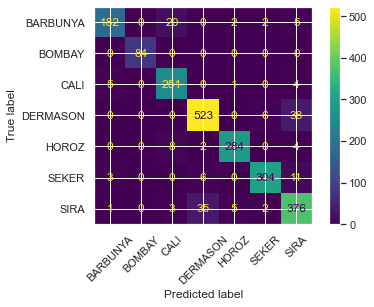

In [72]:
plot_confusion_matrix(pipeline, X_val, y_val, display_labels=classes_names, xticks_rotation=45)

In [73]:
models['Knn_scaling'] = {'pipeline':pipeline, 'f1':cv_score['test_f1'].mean()}

### SVM

In [74]:
features_to_standardize =['AspectRation', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3']

features_to_powerTransform = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea',
                              'EquivDiameter', 'Extent', 'Solidity', 'roundness', 'ShapeFactor4']

scaling = ColumnTransformer(transformers=[
    ('standardization', StandardScaler(), features_to_standardize),
    ('box_cox', PowerTransformer(method='box-cox'), features_to_powerTransform)],
                            
                           remainder='passthrough')

pipeline = Pipeline(steps=[
    ('scaler', scaling),
    ('classifier',SVC(kernel='rbf', C=10, gamma=0.01))])

pipeline.fit(X_train, y_train)





cv_score= cross_validate(pipeline, X_train, y_train, scoring=scoring,cv=5)

print('Cross-validation accuracy',cv_score['test_acc'].mean())
print('Accuracy on training set',pipeline.score(X_train, y_train))
print('Accuracy on test set',pipeline.score(X_val, y_val))


print('\n\nCross-validation F1 score',cv_score['test_f1'].mean())

pred_trainSet = pipeline.predict(X_train)
print('F1 score on training set', f1_score(y_train, pred_trainSet, average='weighted'))

pred_valSet = pipeline.predict(X_val)
print('F1 score on test set', f1_score(y_val, pred_valSet, average='weighted'))

Cross-validation accuracy 0.9266169765146477
Accuracy on training set 0.9299642321449175
Accuracy on test set 0.9298569450853715


Cross-validation F1 score 0.9267351920663819
F1 score on training set 0.930094028304752
F1 score on test set 0.9300872927708428


### Hyperparameter tuning for SVM
Uncomment the following cell to perform hyperparameters tuning

In [75]:
# params = {'classifier__C':[ 1.25,1.26,1.27,1.28,1.29, 1.3,1.31,1.35],
#          'classifier__gamma': [0.1,0.11,0.12,0.13,0.14]}

# randomSearch = RandomizedSearchCV(pipeline, params, n_iter=35, scoring='f1_weighted',
#                                   cv=5,random_state=0, verbose=1, n_jobs=-1)

# randomSearch.fit(X_train, y_train)

# pd.DataFrame(randomSearch.cv_results_).drop(['mean_fit_time','std_fit_time','mean_score_time','std_score_time',
#                                              'param_classifier__C','param_classifier__gamma'], axis=1).sort_values('rank_test_score')

<div style="background-color:rgb(221, 207, 230)">
Best parameters are <b>C=1.28 , gamma=0.11</b>
</div>


In [76]:


scaling = ColumnTransformer(transformers=[
    ('standardization', StandardScaler(), features_to_standardize),
    ('box_cox', PowerTransformer(method='box-cox'), features_to_powerTransform)],
                            
                           remainder='passthrough')

pipeline = Pipeline(steps=[
    ('scaler', scaling),
    ('classifier',SVC(kernel='rbf', C=1.28, gamma=0.11))])

pipeline.fit(X_train, y_train)





cv_score= cross_validate(pipeline, X_train, y_train, scoring=scoring,cv=5)

print('Cross-validation accuracy',cv_score['test_acc'].mean())
print('Accuracy on training set',pipeline.score(X_train, y_train))
print('Accuracy on test set',pipeline.score(X_val, y_val))


print('\n\nCross-validation F1 score',cv_score['test_f1'].mean())

pred_trainSet = pipeline.predict(X_train)
print('F1 score on training set', f1_score(y_train, pred_trainSet, average='weighted'))

pred_valSet = pipeline.predict(X_val)
print('F1 score on test set', f1_score(y_val, pred_valSet, average='weighted'))


Cross-validation accuracy 0.9293863405991702
Accuracy on training set 0.9360793815622476
Accuracy on test set 0.9321642824180896


Cross-validation F1 score 0.929460949533334
F1 score on training set 0.9361741036220805
F1 score on test set 0.9322821742271842


In [77]:
models['svm_scaling_tuned'] = {'pipeline':pipeline, 'f1':cv_score['test_f1'].mean()}

### AdaBoost

In [78]:
features_to_standardize =['AspectRation', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3']

features_to_powerTransform = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea',
                              'EquivDiameter', 'Extent', 'Solidity', 'roundness', 'ShapeFactor4']


scaling = ColumnTransformer(transformers=[
    ('standardization', StandardScaler(), features_to_standardize),
    ('box_cox', PowerTransformer(method='box-cox'), features_to_powerTransform)],
                            
                           remainder='passthrough')

pipeline = Pipeline(steps=[
    ('scaler', scaling),
    ('pca', PCA()),
    ('classifier',AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=86 , max_depth=18, bootstrap=True, n_jobs=-1, random_state=0, max_features=None), n_estimators=23, algorithm='SAMME', learning_rate=0.18, random_state=0))])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardization',
                                                  StandardScaler(),
                                                  ['AspectRation',
                                                   'Compactness',
                                                   'ShapeFactor1',
                                                   'ShapeFactor2',
                                                   'ShapeFactor3']),
                                                 ('box_cox',
                                                  PowerTransformer(method='box-cox'),
                                                  ['Area', 'Perimeter',
                                                   'MajorAxisLength',
                                                   'MinorAxisLength',
                                                   'Eccentricity', 'ConvexArea',


In [79]:
cv_score= cross_validate(pipeline, X_train, y_train, scoring=scoring,cv=5)

print('Cross-validation accuracy',cv_score['test_acc'].mean())
print('Accuracy on training set',pipeline.score(X_train, y_train))
print('Accuracy on test set',pipeline.score(X_val, y_val))


print('\n\nCross-validation F1 score',cv_score['test_f1'].mean())

pred_trainSet = pipeline.predict(X_train)
print('F1 score on training set', f1_score(y_train, pred_trainSet, average='weighted'))

pred_valSet = pipeline.predict(X_val)
print('F1 score on test set', f1_score(y_val, pred_valSet, average='weighted'))

Cross-validation accuracy 0.9186559699063768
Accuracy on training set 0.9998846198223146
Accuracy on test set 0.9220119981541302


Cross-validation F1 score 0.918627028755664
F1 score on training set 0.9998846126659521
F1 score on test set 0.9222113980180313


### Hyperparameter tuning for AdaBoost
Uncomment the following cell to perform hyperparameters tuning

In [80]:
# params = {'classifier__n_estimators': [19,20,21,22,23,24],
#          'classifier__learning_rate': [0.14,0.15,0.16,0.17,0.18,0.19,0.2]}


# randomSearch = RandomizedSearchCV(pipeline, params, n_iter=10, scoring='f1_weighted',
#                                   cv=5,random_state=0, verbose=1, n_jobs=-1)

# randomSearch.fit(X_train, y_train)


# pd.DataFrame(randomSearch.cv_results_).drop(['mean_fit_time','std_fit_time','mean_score_time','std_score_time',
#                                              'param_classifier__n_estimators','param_classifier__learning_rate'], axis=1).sort_values('rank_test_score')

<div style="background-color:rgb(221, 207, 230)">
Best parameters are <b>n_estimators=19 , learning_rate=0.17</b>
</div>


In [81]:
features_to_standardize =['AspectRation', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3']

features_to_powerTransform = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea',
                              'EquivDiameter', 'Extent', 'Solidity', 'roundness', 'ShapeFactor4']


scaling = ColumnTransformer(transformers=[
    ('standardization', StandardScaler(), features_to_standardize),
    ('box_cox', PowerTransformer(method='box-cox'), features_to_powerTransform)],
                            
                           remainder='passthrough')

pipeline = Pipeline(steps=[
    ('scaler', scaling),
    ('pca', PCA()),
    ('classifier',AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=86 , max_depth=18, bootstrap=True, n_jobs=-1, random_state=0, max_features=None), n_estimators=19 , learning_rate=0.17, algorithm='SAMME', random_state=0))])

pipeline.fit(X_train, y_train)

cv_score= cross_validate(pipeline, X_train, y_train, scoring=scoring,cv=5)

print('Cross-validation accuracy',cv_score['test_acc'].mean())
print('Accuracy on training set',pipeline.score(X_train, y_train))
print('Accuracy on test set',pipeline.score(X_val, y_val))


print('\n\nCross-validation F1 score',cv_score['test_f1'].mean())

pred_trainSet = pipeline.predict(X_train)
print('F1 score on training set', f1_score(y_train, pred_trainSet, average='weighted'))

pred_valSet = pipeline.predict(X_val)
print('F1 score on test set', f1_score(y_val, pred_valSet, average='weighted'))

Cross-validation accuracy 0.9188866504138739
Accuracy on training set 0.9998846198223146
Accuracy on test set 0.9229349330872173


Cross-validation F1 score 0.9188442733888621
F1 score on training set 0.9998846126659521
F1 score on test set 0.923152255397719


In [82]:
models['AdaBoost_scaling_tuned'] = {'pipeline':pipeline, 'f1':cv_score['test_f1'].mean()}

### Gradient Boosting

In [83]:
features_to_standardize =['AspectRation', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3']

features_to_powerTransform = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea',
                              'EquivDiameter', 'Extent', 'Solidity', 'roundness', 'ShapeFactor4']


scaling = ColumnTransformer(transformers=[
    ('standardization', StandardScaler(), features_to_standardize),
    ('box_cox', PowerTransformer(method='box-cox'), features_to_powerTransform)],
                            
                           remainder='passthrough')

pipeline = Pipeline(steps=[
    ('scaler', scaling),
    ('pca', PCA()),
    ('classifier',GradientBoostingClassifier(n_estimators=7, learning_rate=0.3, max_depth=3))])

pipeline.fit(X_train, y_train)

cv_score= cross_validate(pipeline, X_train, y_train, scoring=scoring,cv=5)

print('Cross-validation accuracy',cv_score['test_acc'].mean())
print('Accuracy on training set',pipeline.score(X_train, y_train))
print('Accuracy on test set',pipeline.score(X_val, y_val))


print('\n\nCross-validation F1 score',cv_score['test_f1'].mean())

pred_trainSet = pipeline.predict(X_train)
print('F1 score on training set', f1_score(y_train, pred_trainSet, average='weighted'))

pred_valSet = pipeline.predict(X_val)
print('F1 score on test set', f1_score(y_val, pred_valSet, average='weighted'))

Cross-validation accuracy 0.9125400745818167
Accuracy on training set 0.925695165570555
Accuracy on test set 0.9160129210890632


Cross-validation F1 score 0.9124947002308763
F1 score on training set 0.9257190157399415
F1 score on test set 0.9160197967070522


### Hyperparameter tuning fot gradient boosting
Uncomment the following cell to perform hyperparameters tuning

In [84]:
# params = {'classifier__n_estimators': [11,12,13,14,15,16],
#          'classifier__learning_rate': [0.25,0.3,0.35,0.4,0.45],
#          'classifier__max_depth':[4,5,6,7,8,9]}


# randomSearch = RandomizedSearchCV(pipeline, params, n_iter=60, scoring='f1_weighted',
#                                   cv=5,random_state=0, verbose=1, n_jobs=-1)

# randomSearch.fit(X_train, y_train)


# pd.DataFrame(randomSearch.cv_results_).drop(['mean_fit_time','std_fit_time','mean_score_time','std_score_time',
#                                              'param_classifier__n_estimators','param_classifier__learning_rate','param_classifier__max_depth'], axis=1).sort_values('rank_test_score')

<div style="background-color:rgb(221, 207, 230)">
The best parameters are: <b>n_estimators=15, learning_rate=0.4, max_depth=8</b>
</div>


In [85]:
features_to_standardize =['ShapeFactor1', 'ShapeFactor2']

features_to_powerTransform = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',  'ConvexArea', 'EquivDiameter']


scaling = ColumnTransformer(transformers=[
    ('standardization', StandardScaler(), features_to_standardize),
    ('box_cox', PowerTransformer(method='box-cox'), features_to_powerTransform)],
                            
                           remainder='passthrough')

pipeline = Pipeline(steps=[
    ('scaler', scaling),
    ('pca', PCA()),
    ('classifier',GradientBoostingClassifier(n_estimators=12, learning_rate=0.3, max_depth=5, random_state=0))])

pipeline.fit(X_train, y_train)

cv_score= cross_validate(pipeline, X_train, y_train, scoring=scoring,cv=5)

print('Cross-validation accuracy',cv_score['test_acc'].mean())
print('Accuracy on training set',pipeline.score(X_train, y_train))
print('Accuracy on test set',pipeline.score(X_val, y_val))


print('\n\nCross-validation F1 score',cv_score['test_f1'].mean())

pred_trainSet = pipeline.predict(X_train)
print('F1 score on training set', f1_score(y_train, pred_trainSet, average='weighted'))

pred_valSet = pipeline.predict(X_val)
print('F1 score on test set', f1_score(y_val, pred_valSet, average='weighted'))

Cross-validation accuracy 0.9196938325243543
Accuracy on training set 0.9713857159340026
Accuracy on test set 0.9160129210890632


Cross-validation F1 score 0.9199039556607831
F1 score on training set 0.9714329706245554
F1 score on test set 0.9161235155306694


In [86]:
models['gradBoost_scaling_pcaAllComp_tuned'] = {'pipeline':pipeline, 'f1':cv_score['test_f1'].mean()}

### Voting classifier

In [87]:
pipeline = VotingClassifier(estimators=[('svm', models['svm_scaling_tuned']['pipeline']),
                                    ('knn', models['Knn_scaling']['pipeline']),
                                       ('logistic', models['Logistic_scaling']['pipeline']),
                                       ('gradBoost', models['gradBoost_scaling_pcaAllComp_tuned']['pipeline'])],
                        voting='hard', n_jobs=-1)

pipeline.fit(X_train, y_train)



cv_score= cross_validate(pipeline, X_train, y_train, scoring=scoring,cv=5)

print('Cross-validation accuracy',cv_score['test_acc'].mean())
print('Accuracy on training set',pipeline.score(X_train, y_train))
print('Accuracy on test set',pipeline.score(X_val, y_val))


print('\n\nCross-validation F1 score',cv_score['test_f1'].mean())

pred_trainSet = pipeline.predict(X_train)
print('F1 score on training set', f1_score(y_train, pred_trainSet, average='weighted'))

pred_valSet = pipeline.predict(X_val)
print('F1 score on test set', f1_score(y_val, pred_valSet, average='weighted'))

Cross-validation accuracy 0.9288093731094149
Accuracy on training set 0.9396561670704973
Accuracy on test set 0.9275496077526535


Cross-validation F1 score 0.9288242756355928
F1 score on training set 0.9396725269150942
F1 score on test set 0.9275503675475373


In [88]:
models['votingClf_svm_knn_logistic_gradBoost'] = {'pipeline':pipeline, 'f1':cv_score['test_f1'].mean()}

<div style="background-color:rgb(221, 207, 230)">
The problem seems to be in the mis-classifications in <b>'SIRA'</b> and <b>'DERMASON'</b> classes. As shown in the t-SNE visualization, the two classes are intertwined.<br>
One solution would be to train a dedicated model on differentiating between these two classes.<br>
This could be done by passing the instances that were classified as either SIRA or DERMASON to another classifier that was previously trained on these two classes only. 

</div>


# First model: multi-class classification
We will use one of the previous models for that

# Second model: Binary classification between SIRA and DERMASON

### Logistic regression

In [89]:
#subset DERMASON and SIRA instances to train the second model
X_train_dermasonSira, y_train_dermasonSira = get_DERMASON_SIRA_idx(X_train, y_train, classes_names)

In [90]:
#Train the model again on the two classes
features_to_standardize =['ShapeFactor1', 'ShapeFactor2']

features_to_powerTransform = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',  'ConvexArea', 'EquivDiameter']


scaling = ColumnTransformer(transformers=[
    ('standardization', StandardScaler(), features_to_standardize),
    ('box_cox', PowerTransformer(method='box-cox'), features_to_powerTransform)],
                            
                           remainder='passthrough')

pipeline = Pipeline(steps=[
    ('scaler', scaling),
    #('pca', PCA()),
    ('classifier', LogisticRegression(solver='liblinear', max_iter=3000, C=5))])

pipeline.fit(X_train_dermasonSira[disc_features_dermasonSira], y_train_dermasonSira)

Pipeline(steps=[('scaler',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardization',
                                                  StandardScaler(),
                                                  ['ShapeFactor1',
                                                   'ShapeFactor2']),
                                                 ('box_cox',
                                                  PowerTransformer(method='box-cox'),
                                                  ['Area', 'Perimeter',
                                                   'MajorAxisLength',
                                                   'MinorAxisLength',
                                                   'ConvexArea',
                                                   'EquivDiameter'])])),
                ('classifier',
                 LogisticRegression(C=5, max_iter=3000, solver='liblinear'))])

In [91]:
#subset DERMASON and SIRA instances for evaluating the model
X_val_dermasonSira, y_val_dermasonSira = get_DERMASON_SIRA_idx(X_val[disc_features_dermasonSira], y_val, classes_names)

In [92]:
cv_score= cross_validate(pipeline, X_train_dermasonSira[disc_features_dermasonSira], y_train_dermasonSira, scoring=scoring,cv=5)

print('Cross-validation accuracy',cv_score['test_acc'].mean())
print('Accuracy on training set',pipeline.score(X_train_dermasonSira[disc_features_dermasonSira], y_train_dermasonSira))
print('Accuracy on test set',pipeline.score(X_val_dermasonSira[disc_features_dermasonSira], y_val_dermasonSira))


print('\n\nCross-validation F1 score',cv_score['test_f1'].mean())

pred_trainSet_dermasonSira = pipeline.predict(X_train_dermasonSira[disc_features_dermasonSira])
print('F1 score on training set', f1_score(y_train_dermasonSira, pred_trainSet_dermasonSira, average='weighted'))

pred_valSet_dermasonSira = pipeline.predict(X_val_dermasonSira[disc_features_dermasonSira])
print('F1 score on test set', f1_score(y_val_dermasonSira, pred_valSet_dermasonSira, average='weighted'))

Cross-validation accuracy 0.9092722420156047
Accuracy on training set 0.910538286580743
Accuracy on test set 0.9180990899898888


Cross-validation F1 score 0.9093010650779474
F1 score on training set 0.9105584965689097
F1 score on test set 0.9182843967631356


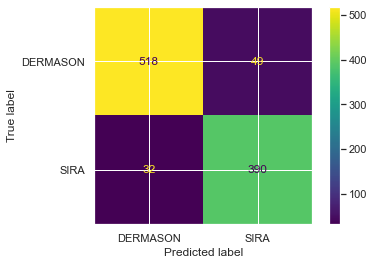

In [93]:
plot_confusion_matrix(pipeline, X_val_dermasonSira[disc_features_dermasonSira], y_val_dermasonSira, display_labels=['DERMASON', 'SIRA'])

In [94]:
models['dermasonSira_logistic_scaling'] = {'pipeline':pipeline, 'f1':cv_score['test_f1'].mean()}

### Random Forest

In [95]:
features_to_standardize =['ShapeFactor1', 'ShapeFactor2']

features_to_powerTransform = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',  'ConvexArea', 'EquivDiameter']


scaling = ColumnTransformer(transformers=[
    ('standardization', StandardScaler(), features_to_standardize),
    ('box_cox', PowerTransformer(method='box-cox'), features_to_powerTransform)],
                            
                           remainder='passthrough')

pipeline = Pipeline(steps=[
    ('scaler', scaling),
    #('pca', PCA()),
    ('classifier', RandomForestClassifier(max_leaf_nodes=100, n_jobs=-1, random_state=0, max_features=None))])

pipeline.fit(X_train_dermasonSira[disc_features_dermasonSira], y_train_dermasonSira)

Pipeline(steps=[('scaler',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardization',
                                                  StandardScaler(),
                                                  ['ShapeFactor1',
                                                   'ShapeFactor2']),
                                                 ('box_cox',
                                                  PowerTransformer(method='box-cox'),
                                                  ['Area', 'Perimeter',
                                                   'MajorAxisLength',
                                                   'MinorAxisLength',
                                                   'ConvexArea',
                                                   'EquivDiameter'])])),
                ('classifier',
                 RandomForestClassifier(max_features=None, max_leaf_nodes=100,
                                 

In [96]:
cv_score= cross_validate(pipeline, X_train_dermasonSira[disc_features_dermasonSira], y_train_dermasonSira, scoring=scoring,cv=5)

print('Cross-validation accuracy',cv_score['test_acc'].mean())
print('Accuracy on training set',pipeline.score(X_train_dermasonSira[disc_features_dermasonSira], y_train_dermasonSira))
print('Accuracy on test set',pipeline.score(X_val_dermasonSira[disc_features_dermasonSira], y_val_dermasonSira))


print('\n\nCross-validation F1 score',cv_score['test_f1'].mean())

pred_trainSet_dermasonSira = pipeline.predict(X_train_dermasonSira[disc_features_dermasonSira])
print('F1 score on training set', f1_score(y_train_dermasonSira, pred_trainSet_dermasonSira, average='weighted'))

pred_valSet_dermasonSira = pipeline.predict(X_val_dermasonSira[disc_features_dermasonSira])
print('F1 score on test set', f1_score(y_val_dermasonSira, pred_valSet_dermasonSira, average='weighted'))

Cross-validation accuracy 0.9120541700187719
Accuracy on training set 0.9770027798837503
Accuracy on test set 0.9221435793731041


Cross-validation F1 score 0.9118590121422514
F1 score on training set 0.9769760739675482
F1 score on test set 0.9222219977924028


### Hyperparameter tuning for random forest
Uncomment the following cell to perform hyperparameters tuning

In [97]:
# # Coarse Stage
# params = {'classifier__n_estimators':[2,40,70, 100],
#          'classifier__max_depth': [2, 15, 30, 60],
#          'classifier__bootstrap': [True, False]}

# randomSearch = RandomizedSearchCV(pipeline, params, n_iter=30, scoring='f1_weighted',
#                                   cv=5,random_state=0, verbose=1, n_jobs=-1)

# randomSearch.fit(X_train_dermasonSira[disc_features_dermasonSira], y_train_dermasonSira)

In [98]:
# pd.DataFrame(randomSearch.cv_results_).drop(['mean_fit_time','std_fit_time','mean_score_time','std_score_time','param_classifier__n_estimators','param_classifier__max_depth','param_classifier__bootstrap'], axis=1)

<div style="background-color:rgb(221, 207, 230)">
From the results of the random search, small max_depth gives better scores, while n_estimators and classifier_bootstap do not have much effect.<br>
</div>


In [99]:
# #Fine Stage
# params = {'classifier__n_estimators':[2,3,4,5,6],
#          'classifier__max_depth': [1,2,3,4,5,6],
#          'classifier__bootstrap': [True, False]}

# randomSearch = RandomizedSearchCV(pipeline, params, n_iter=30, scoring='f1_weighted',
#                                   cv=5,random_state=0, verbose=1, n_jobs=-1)

# randomSearch.fit(X_train_dermasonSira[disc_features_dermasonSira], y_train_dermasonSira)

# pd.DataFrame(randomSearch.cv_results_).drop(['mean_fit_time','std_fit_time','mean_score_time','std_score_time','param_classifier__n_estimators','param_classifier__max_depth','param_classifier__bootstrap'], axis=1)

<div style="background-color:rgb(221, 207, 230)">
The best parameters in terms of f1 score and complexity are n_estimators=2, max_depth=3, bootstrap=False
</div>


In [100]:
features_to_standardize =['ShapeFactor1', 'ShapeFactor2']

features_to_powerTransform = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',  'ConvexArea', 'EquivDiameter']


scaling = ColumnTransformer(transformers=[
    ('standardization', StandardScaler(), features_to_standardize),
    ('box_cox', PowerTransformer(method='box-cox'), features_to_powerTransform)],
                            
                           remainder='passthrough')

pipeline = Pipeline(steps=[
    ('scaler', scaling),
    #('pca', PCA()),
    ('classifier', RandomForestClassifier(n_estimators=2, max_depth=3, bootstrap=False, n_jobs=-1, random_state=0, max_features=None))])

pipeline.fit(X_train_dermasonSira[disc_features_dermasonSira], y_train_dermasonSira)

pipeline.fit(X_train_dermasonSira[disc_features_dermasonSira], y_train_dermasonSira)

cv_score= cross_validate(pipeline, X_train_dermasonSira[disc_features_dermasonSira], y_train_dermasonSira, scoring=scoring,cv=5)

print('Cross-validation accuracy',cv_score['test_acc'].mean())
print('Accuracy on training set',pipeline.score(X_train_dermasonSira[disc_features_dermasonSira], y_train_dermasonSira))
print('Accuracy on test set',pipeline.score(X_val_dermasonSira[disc_features_dermasonSira], y_val_dermasonSira))


print('\n\nCross-validation F1 score',cv_score['test_f1'].mean())

pred_trainSet_dermasonSira = pipeline.predict(X_train_dermasonSira[disc_features_dermasonSira])
print('F1 score on training set', f1_score(y_train_dermasonSira, pred_trainSet_dermasonSira, average='weighted'))

pred_valSet_dermasonSira = pipeline.predict(X_val_dermasonSira[disc_features_dermasonSira])
print('F1 score on test set', f1_score(y_val_dermasonSira, pred_valSet_dermasonSira, average='weighted'))

Cross-validation accuracy 0.9155898428022322
Accuracy on training set 0.9176143543088198
Accuracy on test set 0.923154701718908


Cross-validation F1 score 0.9152186951299415
F1 score on training set 0.9172694185660795
F1 score on test set 0.9231067899712979


In [101]:
models['dermasonSira_RandomForest_scaling_tuned'] = {'pipeline':pipeline, 'f1':cv_score['test_f1'].mean()}

### KNN 

In [102]:
features_to_standardize =['ShapeFactor1', 'ShapeFactor2']

features_to_powerTransform = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',  'ConvexArea', 'EquivDiameter']


scaling = ColumnTransformer(transformers=[
    ('standardization', StandardScaler(), features_to_standardize),
    ('box_cox', PowerTransformer(method='box-cox'), features_to_powerTransform)],
                            
                           remainder='passthrough')

pipeline = Pipeline(steps=[
    ('scaler', scaling),
    ('pca', PCA()),
    ('classifier',KNeighborsClassifier(n_neighbors=30, metric='canberra'))])

pipeline.fit(X_train_dermasonSira[disc_features_dermasonSira], y_train_dermasonSira)

Pipeline(steps=[('scaler',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardization',
                                                  StandardScaler(),
                                                  ['ShapeFactor1',
                                                   'ShapeFactor2']),
                                                 ('box_cox',
                                                  PowerTransformer(method='box-cox'),
                                                  ['Area', 'Perimeter',
                                                   'MajorAxisLength',
                                                   'MinorAxisLength',
                                                   'ConvexArea',
                                                   'EquivDiameter'])])),
                ('pca', PCA()),
                ('classifier',
                 KNeighborsClassifier(metric='canberra', n_neighbors=30))])

In [103]:
cv_score= cross_validate(pipeline, X_train_dermasonSira[disc_features_dermasonSira], y_train_dermasonSira, scoring=scoring,cv=5)

print('Cross-validation accuracy',cv_score['test_acc'].mean())
print('Accuracy on training set',pipeline.score(X_train_dermasonSira[disc_features_dermasonSira], y_train_dermasonSira))
print('Accuracy on test set',pipeline.score(X_val_dermasonSira[disc_features_dermasonSira], y_val_dermasonSira))


print('\n\nCross-validation F1 score',cv_score['test_f1'].mean())

pred_trainSet_dermasonSira = pipeline.predict(X_train_dermasonSira[disc_features_dermasonSira])
print('F1 score on training set', f1_score(y_train_dermasonSira, pred_trainSet_dermasonSira, average='weighted'))

pred_valSet_dermasonSira = pipeline.predict(X_val_dermasonSira[disc_features_dermasonSira])
print('F1 score on test set', f1_score(y_val_dermasonSira, pred_valSet_dermasonSira, average='weighted'))

Cross-validation accuracy 0.9168524690648585
Accuracy on training set 0.9236795552185999
Accuracy on test set 0.9130434782608695


Cross-validation F1 score 0.9169474444460933
F1 score on training set 0.9237247014641926
F1 score on test set 0.9131191162866629


#### Hyperparameter tuning for KNN
Uncomment the following cell to perform hyperparameters tuning

In [104]:
# #Coarse Stage

# params = {'classifier__n_neighbors': [5,20,40,60,70],
#          'classifier__weights': ['uniform', 'distance'],
#          'classifier__metric':['euclidean', 'chebyshev', 'braycurtis','canberra']}


# randomSearch = RandomizedSearchCV(pipeline, params, n_iter=35, scoring='f1_weighted',
#                                   cv=5,random_state=0, verbose=1, n_jobs=-1)

# randomSearch.fit(X_train_dermasonSira[disc_features_dermasonSira], y_train_dermasonSira)


# pd.DataFrame(randomSearch.cv_results_).drop(['mean_fit_time','std_fit_time','mean_score_time','std_score_time',
#                                              'param_classifier__n_neighbors','param_classifier__weights','param_classifier__metric'], axis=1).sort_values('rank_test_score')

<div style="background-color:rgb(221, 207, 230)">
A good range for finer search will be n_neighbors=[20:50], metric=['canberra]
</div>


In [105]:
# params = {'classifier__n_neighbors': [29,30,31,32,33,34,35,36,37,38,39,40,41,42,43],
#          'classifier__weights': ['uniform', 'distance'],
#          'classifier__metric':['canberra']}


# randomSearch = RandomizedSearchCV(pipeline, params, n_iter=35, scoring='f1_weighted',
#                                   cv=5,random_state=0, verbose=1, n_jobs=-1)

# randomSearch.fit(X_train_dermasonSira[disc_features_dermasonSira], y_train_dermasonSira)


# pd.DataFrame(randomSearch.cv_results_).drop(['mean_fit_time','std_fit_time','mean_score_time','std_score_time',
#                                              'param_classifier__n_neighbors','param_classifier__weights','param_classifier__metric'], axis=1).sort_values('rank_test_score')

<div style="background-color:rgb(221, 207, 230)">
The best parameters are: <b>n_neighbors=32, weights='uniform', metric='canberra'</b>
</div>


In [106]:
features_to_standardize =['ShapeFactor1', 'ShapeFactor2']

features_to_powerTransform = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',  'ConvexArea', 'EquivDiameter']


scaling = ColumnTransformer(transformers=[
    ('standardization', StandardScaler(), features_to_standardize),
    ('box_cox', PowerTransformer(method='box-cox'), features_to_powerTransform)],
                            
                           remainder='passthrough')

pipeline = Pipeline(steps=[
    ('scaler', scaling),
    ('pca', PCA()),
    ('classifier',KNeighborsClassifier(n_neighbors=32, weights='uniform', metric='canberra'))])

pipeline.fit(X_train_dermasonSira[disc_features_dermasonSira], y_train_dermasonSira)

Pipeline(steps=[('scaler',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardization',
                                                  StandardScaler(),
                                                  ['ShapeFactor1',
                                                   'ShapeFactor2']),
                                                 ('box_cox',
                                                  PowerTransformer(method='box-cox'),
                                                  ['Area', 'Perimeter',
                                                   'MajorAxisLength',
                                                   'MinorAxisLength',
                                                   'ConvexArea',
                                                   'EquivDiameter'])])),
                ('pca', PCA()),
                ('classifier',
                 KNeighborsClassifier(metric='canberra', n_neighbors=32))])

In [107]:
cv_score= cross_validate(pipeline, X_train_dermasonSira[disc_features_dermasonSira], y_train_dermasonSira, scoring=scoring,cv=5)

print('Cross-validation accuracy',cv_score['test_acc'].mean())
print('Accuracy on training set',pipeline.score(X_train_dermasonSira[disc_features_dermasonSira], y_train_dermasonSira))
print('Accuracy on test set',pipeline.score(X_val_dermasonSira[disc_features_dermasonSira], y_val_dermasonSira))


print('\n\nCross-validation F1 score',cv_score['test_f1'].mean())

pred_trainSet_dermasonSira = pipeline.predict(X_train_dermasonSira[disc_features_dermasonSira])
print('F1 score on training set', f1_score(y_train_dermasonSira, pred_trainSet_dermasonSira, average='weighted'))

pred_valSet_dermasonSira = pipeline.predict(X_val_dermasonSira[disc_features_dermasonSira])
print('F1 score on test set', f1_score(y_val_dermasonSira, pred_valSet_dermasonSira, average='weighted'))

Cross-validation accuracy 0.9191280695705475
Accuracy on training set 0.9229214051048774
Accuracy on test set 0.9120323559150657


Cross-validation F1 score 0.9192219436955336
F1 score on training set 0.922953039643828
F1 score on test set 0.9121209585446628


In [108]:
models['dermasonSira_Knn_Scaled_pcaAllComp_tuned'] = {'pipeline':pipeline, 'f1':cv_score['test_f1'].mean()}

### SVM

In [109]:
features_to_standardize =['ShapeFactor1', 'ShapeFactor2']

features_to_powerTransform = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',  'ConvexArea', 'EquivDiameter']


scaling = ColumnTransformer(transformers=[
    ('standardization', StandardScaler(), features_to_standardize),
    ('box_cox', PowerTransformer(method='box-cox'), features_to_powerTransform)],
                            
                           remainder='passthrough')

pipeline = Pipeline(steps=[
    ('scaler', scaling),
    ('classifier',SVC(kernel='rbf', C=20))])

pipeline.fit(X_train_dermasonSira[disc_features_dermasonSira], y_train_dermasonSira)




cv_score= cross_validate(pipeline, X_train_dermasonSira[disc_features_dermasonSira], y_train_dermasonSira, scoring=scoring,cv=5)

print('Cross-validation accuracy',cv_score['test_acc'].mean())
print('Accuracy on training set',pipeline.score(X_train_dermasonSira[disc_features_dermasonSira], y_train_dermasonSira))
print('Accuracy on test set',pipeline.score(X_val_dermasonSira[disc_features_dermasonSira], y_val_dermasonSira))


print('\n\nCross-validation F1 score',cv_score['test_f1'].mean())

pred_trainSet_dermasonSira = pipeline.predict(X_train_dermasonSira[disc_features_dermasonSira])
print('F1 score on training set', f1_score(y_train_dermasonSira, pred_trainSet_dermasonSira, average='weighted'))

pred_valSet_dermasonSira = pipeline.predict(X_val_dermasonSira[disc_features_dermasonSira])
print('F1 score on test set', f1_score(y_val_dermasonSira, pred_valSet_dermasonSira, average='weighted'))

Cross-validation accuracy 0.9188752250699155
Accuracy on training set 0.919383371240839
Accuracy on test set 0.9211324570273003


Cross-validation F1 score 0.9185521393503848
F1 score on training set 0.9190417170307171
F1 score on test set 0.921004330830767


### Hyperparameter tuning for SVM
Uncomment the following cell to perform hyperparameters tuning

In [110]:
# params = {'classifier__C':np.arange(50,70,1),
#          'classifier__gamma': np.arange(0.3,0.9,0.05)}

# randomSearch = RandomizedSearchCV(pipeline, params, n_iter=40, scoring='f1_weighted',
#                                   cv=5,random_state=0, verbose=1, n_jobs=-1)

# randomSearch.fit(X_train, y_train)

# pd.DataFrame(randomSearch.cv_results_).drop(['mean_fit_time','std_fit_time','mean_score_time','std_score_time',
#                                              'param_classifier__C','param_classifier__gamma'], axis=1).sort_values('rank_test_score')

<div style="background-color:rgb(221, 207, 230)">
The best parameters are: <b>C=61, gamma=0.75</b>
</div>


In [111]:
features_to_standardize =['ShapeFactor1', 'ShapeFactor2']

features_to_powerTransform = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',  'ConvexArea', 'EquivDiameter']


scaling = ColumnTransformer(transformers=[
    ('standardization', StandardScaler(), features_to_standardize),
    ('box_cox', PowerTransformer(method='box-cox'), features_to_powerTransform)],
                            
                           remainder='passthrough')

pipeline = Pipeline(steps=[
    ('scaler', scaling),
    ('classifier',SVC(kernel='rbf', C=61, gamma=0.75))])

pipeline.fit(X_train_dermasonSira[disc_features_dermasonSira], y_train_dermasonSira)




cv_score= cross_validate(pipeline, X_train_dermasonSira[disc_features_dermasonSira], y_train_dermasonSira, scoring=scoring,cv=5)

print('Cross-validation accuracy',cv_score['test_acc'].mean())
print('Accuracy on training set',pipeline.score(X_train_dermasonSira[disc_features_dermasonSira], y_train_dermasonSira))
print('Accuracy on test set',pipeline.score(X_val_dermasonSira[disc_features_dermasonSira], y_val_dermasonSira))


print('\n\nCross-validation F1 score',cv_score['test_f1'].mean())

pred_trainSet_dermasonSira = pipeline.predict(X_train_dermasonSira[disc_features_dermasonSira])
print('F1 score on training set', f1_score(y_train_dermasonSira, pred_trainSet_dermasonSira, average='weighted'))

pred_valSet_dermasonSira = pipeline.predict(X_val_dermasonSira[disc_features_dermasonSira])
print('F1 score on test set', f1_score(y_val_dermasonSira, pred_valSet_dermasonSira, average='weighted'))

Cross-validation accuracy 0.9191287080667612
Accuracy on training set 0.9272175890826384
Accuracy on test set 0.9282103134479271


Cross-validation F1 score 0.9189209283857235
F1 score on training set 0.9270401174388935
F1 score on test set 0.9281769793607597


In [112]:
models['dermasonSira_svm_scaling_tuned'] = {'pipeline':pipeline, 'f1':cv_score['test_f1'].mean()}

### AdaBoost

In [113]:
features_to_standardize =['ShapeFactor1', 'ShapeFactor2']

features_to_powerTransform = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',  'ConvexArea', 'EquivDiameter']


scaling = ColumnTransformer(transformers=[
    ('standardization', StandardScaler(), features_to_standardize),
    ('box_cox', PowerTransformer(method='box-cox'), features_to_powerTransform)],
                            
                           remainder='passthrough')

pipeline = Pipeline(steps=[
    ('scaler', scaling),
    ('pca', PCA()),
    ('classifier',AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=2, max_depth=3, bootstrap=False, n_jobs=-1, random_state=0, max_features=None), n_estimators=25, algorithm='SAMME', learning_rate=0.2, random_state=0))])

pipeline.fit(X_train_dermasonSira[disc_features_dermasonSira], y_train_dermasonSira)

Pipeline(steps=[('scaler',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardization',
                                                  StandardScaler(),
                                                  ['ShapeFactor1',
                                                   'ShapeFactor2']),
                                                 ('box_cox',
                                                  PowerTransformer(method='box-cox'),
                                                  ['Area', 'Perimeter',
                                                   'MajorAxisLength',
                                                   'MinorAxisLength',
                                                   'ConvexArea',
                                                   'EquivDiameter'])])),
                ('pca', PCA()),
                ('classifier',
                 AdaBoostClassifier(algorithm='SAMME',
                         

In [114]:
cv_score= cross_validate(pipeline, X_train_dermasonSira[disc_features_dermasonSira], y_train_dermasonSira, scoring=scoring,cv=5)

print('Cross-validation accuracy',cv_score['test_acc'].mean())
print('Accuracy on training set',pipeline.score(X_train_dermasonSira[disc_features_dermasonSira], y_train_dermasonSira))
print('Accuracy on test set',pipeline.score(X_val_dermasonSira[disc_features_dermasonSira], y_val_dermasonSira))


print('\n\nCross-validation F1 score',cv_score['test_f1'].mean())

pred_trainSet_dermasonSira = pipeline.predict(X_train_dermasonSira[disc_features_dermasonSira])
print('F1 score on training set', f1_score(y_train_dermasonSira, pred_trainSet_dermasonSira, average='weighted'))

pred_valSet_dermasonSira = pipeline.predict(X_val_dermasonSira[disc_features_dermasonSira])
print('F1 score on test set', f1_score(y_val_dermasonSira, pred_valSet_dermasonSira, average='weighted'))

Cross-validation accuracy 0.9183724093016128
Accuracy on training set 0.9249431387414708
Accuracy on test set 0.9261880687563195


Cross-validation F1 score 0.9183529812955913
F1 score on training set 0.9249402769670135
F1 score on test set 0.9262822157448226


### Hyperparameter tuning for AdaBoost
Uncomment the following cell to perform hyperparameters tuning

In [115]:
# params = {'classifier__n_estimators': [19,20,21,22,23,24,25,26,27,28],
#          'classifier__learning_rate': [0.14,0.15,0.16,0.17,0.18,0.19, 0.2, 0.21, 0.22, 0.23,0.24,0.25,0.26]}


# randomSearch = RandomizedSearchCV(pipeline, params, n_iter=25, scoring='f1_weighted',
#                                   cv=5,random_state=0, verbose=3, n_jobs=-1)

# randomSearch.fit(X_train_dermasonSira[disc_features_dermasonSira], y_train_dermasonSira)


# pd.DataFrame(randomSearch.cv_results_).drop(['mean_fit_time','std_fit_time','mean_score_time','std_score_time',
#                                              'param_classifier__n_estimators','param_classifier__learning_rate'], axis=1).sort_values('rank_test_score')

<div style="background-color:rgb(221, 207, 230)">
The best parameters are: <b>n_estimators=23, learning_rate=0.18</b>
</div>


In [116]:
features_to_standardize =['ShapeFactor1', 'ShapeFactor2']

features_to_powerTransform = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',  'ConvexArea', 'EquivDiameter']


scaling = ColumnTransformer(transformers=[
    ('standardization', StandardScaler(), features_to_standardize),
    ('box_cox', PowerTransformer(method='box-cox'), features_to_powerTransform)],
                            
                           remainder='passthrough')

pipeline = Pipeline(steps=[
    ('scaler', scaling),
    ('pca', PCA()),
    ('classifier',AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=2, max_depth=3, bootstrap=False, n_jobs=-1, random_state=0, max_features=None), n_estimators=23, learning_rate=0.18, algorithm='SAMME', random_state=0))])

pipeline.fit(X_train_dermasonSira[disc_features_dermasonSira], y_train_dermasonSira)

Pipeline(steps=[('scaler',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardization',
                                                  StandardScaler(),
                                                  ['ShapeFactor1',
                                                   'ShapeFactor2']),
                                                 ('box_cox',
                                                  PowerTransformer(method='box-cox'),
                                                  ['Area', 'Perimeter',
                                                   'MajorAxisLength',
                                                   'MinorAxisLength',
                                                   'ConvexArea',
                                                   'EquivDiameter'])])),
                ('pca', PCA()),
                ('classifier',
                 AdaBoostClassifier(algorithm='SAMME',
                         

In [117]:
cv_score= cross_validate(pipeline, X_train_dermasonSira[disc_features_dermasonSira], y_train_dermasonSira, scoring=scoring,cv=5)

print('Cross-validation accuracy',cv_score['test_acc'].mean())
print('Accuracy on training set',pipeline.score(X_train_dermasonSira[disc_features_dermasonSira], y_train_dermasonSira))
print('Accuracy on test set',pipeline.score(X_val_dermasonSira[disc_features_dermasonSira], y_val_dermasonSira))


print('\n\nCross-validation F1 score',cv_score['test_f1'].mean())

pred_trainSet_dermasonSira = pipeline.predict(X_train_dermasonSira[disc_features_dermasonSira])
print('F1 score on training set', f1_score(y_train_dermasonSira, pred_trainSet_dermasonSira, average='weighted'))

pred_valSet_dermasonSira = pipeline.predict(X_val_dermasonSira[disc_features_dermasonSira])
print('F1 score on test set', f1_score(y_val_dermasonSira, pred_valSet_dermasonSira, average='weighted'))

Cross-validation accuracy 0.9214039893243433
Accuracy on training set 0.9264594389689158
Accuracy on test set 0.9221435793731041


Cross-validation F1 score 0.9213747462500465
F1 score on training set 0.9265002969008982
F1 score on test set 0.9223015243412461


In [118]:
models['dermasonSira_adaboostRF_scaling_pcaAllComp_tuned'] = {'pipeline':pipeline, 'f1':cv_score['test_f1'].mean()}

### Gradient Boosted Decision Trees 

In [119]:
from sklearn.ensemble import GradientBoostingClassifier

In [120]:
features_to_standardize =['ShapeFactor1', 'ShapeFactor2']

features_to_powerTransform = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',  'ConvexArea', 'EquivDiameter']


scaling = ColumnTransformer(transformers=[
    ('standardization', StandardScaler(), features_to_standardize),
    ('box_cox', PowerTransformer(method='box-cox'), features_to_powerTransform)],
                            
                           remainder='passthrough')

pipeline = Pipeline(steps=[
    ('scaler', scaling),
    ('pca', PCA()),
    ('classifier',GradientBoostingClassifier(n_estimators=9, learning_rate=0.5, max_depth=2))])

pipeline.fit(X_train_dermasonSira[disc_features_dermasonSira], y_train_dermasonSira)



cv_score= cross_validate(pipeline, X_train_dermasonSira[disc_features_dermasonSira], y_train_dermasonSira, scoring=scoring,cv=5)

print('Cross-validation accuracy',cv_score['test_acc'].mean())
print('Accuracy on training set',pipeline.score(X_train_dermasonSira[disc_features_dermasonSira], y_train_dermasonSira))
print('Accuracy on test set',pipeline.score(X_val_dermasonSira[disc_features_dermasonSira], y_val_dermasonSira))


print('\n\nCross-validation F1 score',cv_score['test_f1'].mean())

pred_trainSet_dermasonSira = pipeline.predict(X_train_dermasonSira[disc_features_dermasonSira])
print('F1 score on training set', f1_score(y_train_dermasonSira, pred_trainSet_dermasonSira, average='weighted'))

pred_valSet_dermasonSira = pipeline.predict(X_val_dermasonSira[disc_features_dermasonSira])
print('F1 score on test set', f1_score(y_val_dermasonSira, pred_valSet_dermasonSira, average='weighted'))

Cross-validation accuracy 0.918875863566129
Accuracy on training set 0.9257012888551933
Accuracy on test set 0.9241658240647118


Cross-validation F1 score 0.9188179603346072
F1 score on training set 0.9255201198855371
F1 score on test set 0.9240293871885763


### Hyperparameter tuning fot gradient boosting
Uncomment the following cell to perform hyperparameters tuning

In [121]:
# params = {'classifier__n_estimators': [3,4,5,6,7,8,9,10],
#          'classifier__learning_rate': [0.2,0.3,0.35,0.4,0.45,0.5],
#          'classifier__max_depth':[1,2,3,4,5]}


# randomSearch = RandomizedSearchCV(pipeline, params, n_iter=50, scoring='f1_weighted',
#                                   cv=5,random_state=0, verbose=1, n_jobs=-1)

# randomSearch.fit(X_train_dermasonSira[disc_features_dermasonSira], y_train_dermasonSira)


# pd.DataFrame(randomSearch.cv_results_).drop(['mean_fit_time','std_fit_time','mean_score_time','std_score_time',
#                                              'param_classifier__n_estimators','param_classifier__learning_rate','param_classifier__max_depth'], axis=1).sort_values('rank_test_score')

<div style="background-color:rgb(221, 207, 230)">
The best parameters are: <b>n_estimators=5, learning_rate=0.4, max_depth=3</b>
</div>


In [122]:
features_to_standardize =['ShapeFactor1', 'ShapeFactor2']

features_to_powerTransform = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',  'ConvexArea', 'EquivDiameter']


scaling = ColumnTransformer(transformers=[
    ('standardization', StandardScaler(), features_to_standardize),
    ('box_cox', PowerTransformer(method='box-cox'), features_to_powerTransform)],
                            
                           remainder='passthrough')

pipeline = Pipeline(steps=[
    ('scaler', scaling),
    ('pca', PCA()),
    ('classifier',GradientBoostingClassifier(n_estimators=5, learning_rate=0.4, max_depth=3, random_state=0))])

pipeline.fit(X_train_dermasonSira[disc_features_dermasonSira], y_train_dermasonSira)



cv_score= cross_validate(pipeline, X_train_dermasonSira[disc_features_dermasonSira], y_train_dermasonSira, scoring=scoring,cv=5)

print('Cross-validation accuracy',cv_score['test_acc'].mean())
print('Accuracy on training set',pipeline.score(X_train_dermasonSira[disc_features_dermasonSira], y_train_dermasonSira))
print('Accuracy on test set',pipeline.score(X_val_dermasonSira[disc_features_dermasonSira], y_val_dermasonSira))


print('\n\nCross-validation F1 score',cv_score['test_f1'].mean())

pred_trainSet_dermasonSira = pipeline.predict(X_train_dermasonSira[disc_features_dermasonSira])
print('F1 score on training set', f1_score(y_train_dermasonSira, pred_trainSet_dermasonSira, average='weighted'))

pred_valSet_dermasonSira = pipeline.predict(X_val_dermasonSira[disc_features_dermasonSira])
print('F1 score on test set', f1_score(y_val_dermasonSira, pred_valSet_dermasonSira, average='weighted'))

Cross-validation accuracy 0.9221606073375984
Accuracy on training set 0.9272175890826384
Accuracy on test set 0.9201213346814965


Cross-validation F1 score 0.9221008202393381
F1 score on training set 0.9271238460790898
F1 score on test set 0.9200842446408453


In [123]:
models['dermasonSira_gradBoost_scaling_pcaAllComp_tuned'] = {'pipeline':pipeline, 'f1':cv_score['test_f1'].mean()}

### Voting Classifier

In [124]:
pipeline = VotingClassifier(estimators=[('gradBoost', models['dermasonSira_gradBoost_scaling_pcaAllComp_tuned']['pipeline']),
                                    ('adaboost', models['dermasonSira_adaboostRF_scaling_pcaAllComp_tuned']['pipeline']),
                                       ('svm', models['dermasonSira_svm_scaling_tuned']['pipeline']),
                                       ('knn', models['dermasonSira_Knn_Scaled_pcaAllComp_tuned']['pipeline'])],
                        voting='hard', n_jobs=-1)

pipeline.fit(X_train_dermasonSira[disc_features_dermasonSira], y_train_dermasonSira)



cv_score= cross_validate(pipeline, X_train_dermasonSira[disc_features_dermasonSira], y_train_dermasonSira, scoring=scoring,cv=5)

print('Cross-validation accuracy',cv_score['test_acc'].mean())
print('Accuracy on training set',pipeline.score(X_train_dermasonSira[disc_features_dermasonSira], y_train_dermasonSira))
print('Accuracy on test set',pipeline.score(X_val_dermasonSira[disc_features_dermasonSira], y_val_dermasonSira))


print('\n\nCross-validation F1 score',cv_score['test_f1'].mean())

pred_trainSet_dermasonSira = pipeline.predict(X_train_dermasonSira[disc_features_dermasonSira])
print('F1 score on training set', f1_score(y_train_dermasonSira, pred_trainSet_dermasonSira, average='weighted'))

pred_valSet_dermasonSira = pipeline.predict(X_val_dermasonSira[disc_features_dermasonSira])
print('F1 score on test set', f1_score(y_val_dermasonSira, pred_valSet_dermasonSira, average='weighted'))

Cross-validation accuracy 0.9231716660920201
Accuracy on training set 0.9299974728329543
Accuracy on test set 0.9241658240647118


Cross-validation F1 score 0.923027448840557
F1 score on training set 0.929842776014114
F1 score on test set 0.9241063071307479


In [125]:
models['dermasonSira_votingClf_gradBoost_adaBoost_svm_knn'] = {'pipeline':pipeline, 'f1':cv_score['test_f1'].mean()}

# Evaluating the chained classifiers

In [126]:
def combine_classifiers_res(res_firstModel, res_secondModel, classes_names):
    res_firstModel_copy = np.copy(res_firstModel)
    #find the indices of predicted DERMASON and SIRA in the predictions of the first model 
    dermason_sira_idx_firstModel = np.where((res_firstModel==classes_names.tolist().index('DERMASON')) | (res_firstModel==classes_names.tolist().index('SIRA')) )[0]
    
    #replace the values at these indices with the results from the second model
    np.put(res_firstModel_copy, dermason_sira_idx_firstModel, res_secondModel)
    return res_firstModel_copy

In [127]:
#Predict using the first model
eval_preds_firstModel = models['svm_scaling_tuned']['pipeline'].predict(X_val)

#Extract instances that got clasified as DERMASON or SIRA for correction
X_eval_dermasonSira, y_eval_dermasonSira = get_DERMASON_SIRA_idx(X_val, eval_preds_firstModel, classes_names)

#predict the output of these instances using the second model
eval_preds_secondModel = models['dermasonSira_votingClf_gradBoost_adaBoost_svm_knn']['pipeline'].predict(X_eval_dermasonSira[disc_features_dermasonSira])

#Combine the results from both classifiers
final_eval_preds = combine_classifiers_res(eval_preds_firstModel, eval_preds_secondModel, classes_names)

In [128]:
f1_score(y_val, final_eval_preds, average='weighted')

0.9299288459129612

In [129]:
confusion_matrix(y_val, final_eval_preds)

array([[187,   0,  16,   0,   1,   2,   5],
       [  0,  84,   0,   0,   0,   0,   0],
       [  7,   0, 249,   0,   2,   0,   3],
       [  0,   0,   0, 529,   0,   5,  33],
       [  0,   0,   5,   3, 286,   0,   4],
       [  3,   0,   0,   8,   0, 307,   6],
       [  1,   0,   1,  40,   5,   2, 373]], dtype=int64)

# Generating submission file

In [130]:
test_df=pd.read_csv("test.csv")
test_df.head()

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,10834,57659,955.434,387.757607,196.625782,1.972059,0.861896,60188,270.949661,0.620790,0.957982,0.793735,0.698760,0.006725,0.000989,0.488266,0.962889
1,10835,28772,630.362,229.990785,159.609367,1.440960,0.719993,29127,191.399185,0.767458,0.987812,0.909913,0.832204,0.007994,0.002365,0.692563,0.997956
2,10836,54677,911.022,308.853903,226.398571,1.364204,0.680198,55858,263.850182,0.753013,0.978857,0.827860,0.854288,0.005649,0.001856,0.729808,0.995607
3,10837,24827,578.304,214.192699,147.788172,1.449322,0.723831,25121,177.794033,0.716508,0.988297,0.932871,0.830066,0.008627,0.002526,0.689009,0.998596
4,10838,141850,1432.847,524.923471,346.910920,1.513136,0.750492,143680,424.981211,0.804617,0.987263,0.868240,0.809606,0.003701,0.000981,0.655462,0.991803


In [131]:
#first stage of classification
test_firstModel_preds = models['svm_scaling_tuned']['pipeline'].predict(test_df.drop('ID', axis=1))

#Extract instances that got clasified as DERMASON or SIRA for correction
X_test_dermasonSira, y_test_dermasonSira = get_DERMASON_SIRA_idx(test_df.drop('ID', axis=1), test_firstModel_preds, classes_names)

#predict the output of these instances using the second model
test_secondModel_preds = models['dermasonSira_votingClf_gradBoost_adaBoost_svm_knn']['pipeline'].predict(X_test_dermasonSira[disc_features_dermasonSira])

#Combine the results from both classifiers
final_test_preds = combine_classifiers_res(test_firstModel_preds, test_secondModel_preds, classes_names)

In [132]:
#Convert the encoded labels back to the original class names
final_test_preds = label_enc.inverse_transform(final_test_preds)

In [133]:
test_df['y']=final_test_preds

In [134]:
test_df.head()

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
0,10834,57659,955.434,387.757607,196.625782,1.972059,0.861896,60188,270.949661,0.620790,0.957982,0.793735,0.698760,0.006725,0.000989,0.488266,0.962889,HOROZ
1,10835,28772,630.362,229.990785,159.609367,1.440960,0.719993,29127,191.399185,0.767458,0.987812,0.909913,0.832204,0.007994,0.002365,0.692563,0.997956,DERMASON
2,10836,54677,911.022,308.853903,226.398571,1.364204,0.680198,55858,263.850182,0.753013,0.978857,0.827860,0.854288,0.005649,0.001856,0.729808,0.995607,BARBUNYA
3,10837,24827,578.304,214.192699,147.788172,1.449322,0.723831,25121,177.794033,0.716508,0.988297,0.932871,0.830066,0.008627,0.002526,0.689009,0.998596,DERMASON
4,10838,141850,1432.847,524.923471,346.910920,1.513136,0.750492,143680,424.981211,0.804617,0.987263,0.868240,0.809606,0.003701,0.000981,0.655462,0.991803,BOMBAY


In [135]:
test_df[['ID', 'y']].to_csv('submissionFile.csv', index=False)